<a href="https://colab.research.google.com/github/pelegrinoo/I4.0-contents/blob/main/Testes_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                              TESTES DE REDES NEURAIS COM DADOS DE FALHAS COLETADOS COM ACELERÔMETRO MPU6050

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# <font size = 5> Bibliotecas utilizadas

`os` : Permite interagir com o sistema operacional ( como manipular arquivos e diretórios ).

`gc` : Gerencia o uso de memória do Colab

`time` : Fornece funções relacionadas ao tempo, como pausas e medição de duração.

`random` : Gera números e seleções aleatórias.

`warnings` : Gerencia avisos do Python.

---

In [1]:
import os
import gc
import time
import random
import warnings

<br>`fft` | `fftfreq` : Importa funções para calcular a Transformada Rápida de Fourier e as frequências associadas.

`norm` | `entropy` | `skew` | `kurtosis` : Importa funções estatísticas de distribuições normais, entropia, assimetria e curtose.

`hilbert` : Importa a transformada de Hilbert, usada para obter o sinal analítico ( amplitude e fase instantâneas ).

---

In [2]:
from scipy.fft    import fft, fftfreq
from scipy.stats  import norm, entropy, skew, kurtosis
from scipy.signal import hilbert

<br>`numpy as np` : Operações numéricas e manipulação eficiente de arrays.

`pandas as pd` : Análise e manipulação de dados em estruturas como DataFrames.

`pickle as pic` : Salvar e carregar objetos Python em arquivos binários.

`tensorflow as tf` : Criação e treinamento de modelos de machine learning e deep learning.

`matplotlib.cm as cm` : Importa mapas de cores ( colormaps ) usados para visualizações em gráficos.

`matplotlib.pyplot as plt` : Criação de gráficos e visualizações em estilo semelhante ao MATLAB.

---

In [3]:
import numpy             as np
import pandas            as pd
import pickle            as pic
import tensorflow        as tf
import matplotlib.cm     as cm
import matplotlib.pyplot as plt

<br>`confusion_matrix` | `ConfusionMatrixDisplay` | `accuracy_score` | `mean_absolute_error` : Métricas de análise dos modelos

`MinMaxScaler` | `LabelEncoder` | `PowerTransformer`: Ferramentas para normalizar dados, codificar rótulos e transformar distribuições.

`train_test_split` : Função para dividir os dados em conjuntos de treino e teste.

---

In [4]:
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_absolute_error
from sklearn.preprocessing   import MinMaxScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split

<br>`drive` : Biblioteca para conectar o Colab no GoogleDrive

---

In [5]:
from google.colab import drive   # Biblioteca para permitir o uso do Drive

# <font size = 5> Conexão ao drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


# <font size = 5> Funções

<center> <font size = 4> CALCULA A FFT E RETORNA FREQUÊNCIAS E MAGNITUDES

---

ENTRADAS DA FUNÇÃO:

><font color = 9bdafc> t <font color = white> : vetor de tempo ou índices, contendo os valores do sinal ao longo do eixo X.
<br><font color = 9bdafc> sinal <font color = white> : vetor de amplitude do sinal a ser analisado, correspondente ao eixo Y.

In [7]:
def calcula_fft(t, sinal):

    # Inicia a contagem de tempo de uso da célula
    start_time = time.time()

    # Calcular a transformada de Fourier com scipy
    N = len(t)
    T = t[1] - t[0]

    transformadas = fft(sinal)

    freq = fftfreq(N, T)

    magnitudes = np.abs(transformadas)

    del sinal, t

    gc.collect()

    end_time = time.time()

    execution_time = end_time - start_time

    minutes = int(execution_time // 60)
    seconds = int(execution_time % 60)

    print(f"\nTempo de execução: {minutes} min {seconds} s")

    return freq, magnitudes

<br> <center> <font size = 4> GERA GRÁFICO DA FFT

---

ENTRADAS DA FUNÇÃO:

><font color = 9bdafc> t <font color = white> : vetor de tempo ou índices, contendo os valores do sinal ao longo do eixo X.
<br><font color = 9bdafc> sinal <font color = white> : vetor de amplitude do sinal a ser analisado, correspondente ao eixo Y.
<br><font color = 9bdafc> titulo <font color = white> : título do gráfico que será exibido junto ao sinal original.
<br><font color = 9bdafc> figure_size <font color = white> : define o tamanho da imagem.
<br><font color = 9bdafc> intervalo_fft_y <font color = white> : define o intervalo no eixo Y se necessário

In [8]:
def grafico_fft(t, sinal, titulo, figure_size, intervalo_fft_y = None,):

    # Retira avisos
    warnings.filterwarnings('ignore')

    # Inicia a contagem de tempo de uso da célula
    start_time = time.time()

    # Calcular a transformada de Fourier com scipy
    N = len(t)
    T = t[1] - t[0]

    transformadas = fft(sinal)

    freq = fftfreq(N, T)

    # Criar a figura e os subplots
    fig, axs = plt.subplots(1, 2, figsize = figure_size)

    # Plotar o sinal original
    axs[0].plot(t, sinal, label = 'Sinal Original')
    axs[0].set_xlabel('Tempo ou posição')
    axs[0].set_ylabel('Amplitude')
    axs[0].set_title(f'Sinal Original {titulo}')
    axs[0].legend()

    # Plotar a FFT
    axs[1].plot(freq, np.abs(transformadas), label = 'Transformada de Fourier')
    axs[1].set_xlabel('Frequência (Hz)')
    axs[1].set_ylabel('Magnitude')
    axs[1].set_title('Transformada de Fourier')
    axs[1].legend()

    axs[1].set_xlim((0,0.5))

    if intervalo_fft_y != None:
        axs[1].set_ylim(intervalo_fft_y)

    plt.tight_layout()
    plt.show()

    plt.close(fig)
    del fig, axs, sinal, t, freq, transformadas
    gc.collect()

    end_time = time.time()

    execution_time = end_time - start_time

    minutes = int(execution_time // 60)
    seconds = int(execution_time % 60)

    print(f"\nTempo de execução: {minutes} min {seconds} s")

<br> <center> <font size = 4> AJUSTA LISTAS DE DADOS DE UMA LISTA ÚNICA </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> data_to_organize <font color = white> : lista de arrays (ou listas), onde cada elemento pode ter um tamanho diferente, mas todos precisam ser ajustados para o mesmo tamanho mínimo.

In [9]:
def ajust_len_array(data_to_organize):

    min_length = min(len(arr) for arr in data_to_organize)
    data_ajustado = [arr[:min_length] for arr in data_to_organize]

    return data_ajustado

<br> <center> <font size = 4> CALCULA DADOS ESTATÍSTICOS DE UMA LISTA DE ARRAYS </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dfs <font color = white> : lista de arrays ou listas, cada um contendo dados numéricos para os quais as estatísticas serão calculadas.

In [10]:
def calcular_estatisticas(dfs):

    # Lista para armazenar os resultados de cada array
    resultados = []

    # Itera sobre cada array na lista
    for i, array in enumerate(dfs, start=1):

        media = np.mean(array)                                                  # Média
        desvio_padrao = np.std(array)                                           # Desvio Padrão
        maximo = np.max(array)                                                  # Máximo
        minimo = np.min(array)                                                  # Mínimo
        coeficiente_variacao = desvio_padrao / media if media != 0 else np.nan  # Coeficiente de Variação
        assimetria = skew(array)                                                # Assimetria
        curtose = kurtosis(array)                                               # Kurtosis
        iqr = np.percentile(array, 75) - np.percentile(array, 25)               # Amplitude Interquartil

        # Calcula a entropia com histogramas, usando +1 para evitar log(0)
        hist, _ = np.histogram(array, bins=10)
        entropia = entropy(hist + 1)

        # Armazena os resultados em um dicionário
        stats = {
            'Array': f'{i}ª Lista',
            'Média':          media,
            'Desvio Padrão':  desvio_padrao,
            'Máximo':         maximo,
            'Mínimo':         minimo,
            'Coef. Variação': coeficiente_variacao,
            'Assimetria':     assimetria,
            'Curtose':        curtose,
            'IQR':            iqr,
            'Entropia':       entropia
        }

        # Adiciona o dicionário à lista de resultados
        resultados.append(stats)

    # Converte a lista de dicionários para um DataFrame final
    tabela_final = pd.DataFrame(resultados).reset_index(drop = True)

    tabela_estilizada = (

        tabela_final.style
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
        .format(precision = 4)
    )

    display(tabela_estilizada)

    return tabela_estilizada.hide(axis="index")

<br> <center> <font size = 4> NORMALIZA DADOS DE UMA LISTA COM OUTRAS LISTAS DE DADOS </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dados <font color = white> : lista de arrays ou listas contendo dados numéricos que serão normalizados utilizando o método Min-Max.

In [11]:
def norm_Min_Max(dados, nomes):

  print(f'Máximo e Mínimo dos dados antes da normalização respectivamente: \n')

  for i in range(len(dados)): print(f'{nomes[i]}: {round(max(dados[i]),3)} | {round(min(dados[i]),3)}')

  dados_norm = []

  for i in range(len(dados)):

    vals_data= np.array(dados[i]).reshape(-1, 1)
    vals_data_norm = MinMaxScaler().fit_transform(vals_data).flatten()
    dados_norm.append(vals_data_norm)

  print(f'\nMáximo e Mínimo dos dados depois da normalização respectivamente: \n')

  for i in range(len(dados_norm)): print(f'{nomes[i]}: {round(max(dados_norm[i]),2)} | {round(min(dados_norm[i]),2)}')

  return dados_norm

<br> <center> <font size = 4> FUNÇÃO QUE GERA DADOS ONE-HOT E UTILIZAÇÃO DO ENCODER (OHE) </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dados <font color = white> : lista de vetores, onde cada vetor contém uma sequência de dados a ser segmentada.  
><font color = 9bdafc> labels <font color = white> : lista de rótulos correspondentes a cada vetor de dados em <font color = 9bdafc> dados<font color = white>.  
><font color = 9bdafc> divisao <font color = white> : tamanho do segmento em que os dados serão divididos.  
><font color = 9bdafc> stride <font color = white> : deslocamento entre os segmentos ao dividir os dados.  
><font color = 9bdafc> tamanho_img <font color = white> : dimensão do lado da imagem (assumido que cada segmento será remodelado para uma imagem quadrada de tamanho tamanho_img x tamanho_img).

In [12]:
def encoder_strides_ndim(dados, labels, divisao, stride, tamanho_img):

    X = []
    Y = []

    # Iterar sobre as amostras (cada amostra é uma matriz de (num_samples, N))
    for i in range(dados.shape[0]):
        vetor = dados[i]
        label = labels[i]

        # Aplicando stride e divisão
        for start in range(0, vetor.shape[0] - divisao, stride):
            segmento = vetor[start:start + divisao, :]

            # Ajustando o formato para (tamanho_img, tamanho_img, N)
            X.append(segmento.reshape((tamanho_img, tamanho_img, vetor.shape[1])))
            Y.append(label)

    # Conversão para arrays numpy
    X = np.array(X)
    Y = np.array(Y)

    # Codificação das etiquetas
    encoder = LabelEncoder()
    encoded_Y = encoder.fit_transform(Y)
    OHE_Y = tf.keras.utils.to_categorical(encoded_Y)

    # Resultados
    print(f'Dados de entrada: {X.shape}')
    print(f'\nLabels codificados: {OHE_Y.shape}')

    return X, OHE_Y

<br> <center> <font size = 4> FUNÇÃO PLOTA OS DADOS GERADOS PELO OHE </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dados <font color = white> : lista de vetores, onde cada vetor contém uma sequência de dados a ser segmentada.  
><font color = 9bdafc> labels <font color = white> : lista de rótulos correspondentes a cada vetor de dados em <font color = 9bdafc> dados<font color = white>.  
><font color = 9bdafc> num_div <font color = white> : número de elementos a serem extraídos de cada vetor para formar o segmento que será exibido como imagem.

In [13]:
def plot_segments_encoder(dados, labels, num_div):

  # Número de imagens a serem exibidas
  num_imagens = len(labels)

  # Seleciona aleatoriamente um índice de imagem de cada tipo de dado
  indices = []

  for vetor in dados:
      max_index = len(vetor) - num_div
      random_index = random.randint(0, max_index - 1)
      indices.append(random_index)

  # Preparar a visualização
  fig, axs = plt.subplots(1, num_imagens, figsize=(15, 5))

  # Exibir as imagens aleatórias
  for i, index in enumerate(indices):
      segmento = dados[i][index:index + num_div]
      axs[i].imshow(segmento.reshape((tamanho_img, tamanho_img)), cmap='gray', interpolation='nearest')
      axs[i].axis('off')
      axs[i].set_title(labels[i])

  plt.tight_layout()
  plt.show()

<br> <center> <font size = 4> DIVISÃO DOS DADOS EM TREINO, VALIDAÇÃO, TESTE E PRINTA O SHAPE DE CADA DADO </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> X <font color = white> : array de dados de entrada (features) para treinamento, validação e teste.  
><font color = 9bdafc> Y <font color = white> : array de rótulos (labels) correspondentes aos dados de entrada.  
><font color = 9bdafc> div_treino <font color = white> : proporção dos dados destinados ao treinamento (não utilizado diretamente, pois é calculado com base nas outras divisões).  
><font color = 9bdafc> div_valida <font color = white> : proporção dos dados destinados à validação.  
><font color = 9bdafc> div_testes <font color = white> : proporção dos dados destinados ao teste.

In [14]:
def train_valid_test(X, Y, div_treino, div_valida, div_testes):

  X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size = (div_valida + div_testes), shuffle=True)

  taxa_valid = div_valida / (div_testes + div_valida)

  X_test, X_validate, y_test, y_validate = train_test_split(X_temp, y_temp, test_size = taxa_valid, shuffle=True)

  print(f"Shape dos dados de treinamento: {X_train.shape}")
  print(f"Shape dos dados de validação:   {X_validate.shape}")
  print(f"Shape dos dados de teste:       {X_test.shape}")

  return X_train, X_validate, X_test, y_train, y_validate, y_test

<br> <center> <font size = 4> CRIA DATASETS DE TREINO, DE VALIDAÇÃO OU DE TESTE </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> X <font color = white> : array de dados de entrada (features) a serem usados no treinamento.  
><font color = 9bdafc> y <font color = white> : array de rótulos (labels) correspondentes aos dados de entrada.  
><font color = 9bdafc> batch_size <font color = white> : tamanho do lote (batch) para agrupamento dos dados no dataset.

In [15]:
def create_dataset(X, y, batch_size):

    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    dataset = dataset.shuffle(buffer_size=len(X))
    dataset = dataset.batch(batch_size)

    return dataset

<br> <center> <font size = 4> PLOTA AS CURVAS DE APRENDIZADO, TREINAMENTO E VALIDAÇÃO </center>

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> loaded_data <font color = white> : histórico de treinamento carregados
<br><font color = 9bdafc> epocs <font color = white> : épocas, ou tempo de treinamento da rede neural

In [16]:
def plot_model(loaded_data, epochs):

    accuracy = loaded_data['history']['accuracy']
    val_accuracy = loaded_data['history']['val_accuracy']

    loss  = loaded_data['history']['loss']
    val_loss = loaded_data['history']['val_loss']


    precision = loaded_data['history']['precision']
    val_precision = loaded_data['history']['val_precision']

    recall = loaded_data['history']['recall']
    val_recall = loaded_data['history']['val_recall']

    epochs_range = range(epochs)

    plt.figure(figsize = (13,8))

    plt.subplot(2, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(2, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(2, 2, 3)
    plt.title('Training and Validation Precision')
    plt.plot(epochs_range, precision, label='Training Precision')
    plt.plot(epochs_range, val_precision, label='Validation Precision')
    plt.legend(loc='lower right')

    plt.subplot(2, 2, 4)
    plt.title('Training and Validation Recall')
    plt.plot(epochs_range, recall, label='Training Recall')
    plt.plot(epochs_range, val_recall, label='Validation Recall')
    plt.legend(loc='lower right')

    plt.show()

<br><center><font size = 4> PLOT DA MATRIZ DE CONFUSÃO

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> y_true <font color = white> : dados de saídas reais gerados pela função test_model
<br><font color = 9bdafc> y_pred <font color = white> : dados de saídas preditas pelo modelo gerados pela função test_model
<br><font color = 9bdafc> classes <font color = white> : classes ou tipos de dados do problema, ou labels

In [17]:
def matriz_confusao(y_true, y_pred, classes):

    # Calcula a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Cria a figura e o eixo da matriz de confusão
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Adiciona os rótulos dos eixos
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel='Verdadeiro',
           xlabel='Previsto')

    # Adiciona as anotações dos valores na matriz (valores inteiros e porcentagens)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        row_sum = cm[i].sum()  # Total de verdadeiros na linha
        for j in range(cm.shape[1]):
            value = cm[i, j]
            # Calcula o valor em porcentagem em relação ao total da linha
            percent = 100 * value / row_sum if row_sum > 0 else 0
            # Exibe o valor inteiro e a porcentagem acima
            ax.text(j, i, f"{value}\n({percent:.1f}%)",
                    ha="center", va="center",
                    color="white" if value > thresh else "black")

    plt.title("Matriz de Confusão")
    plt.show()

<br><center><font size = 4> JANELAMENTO PARA CRIAÇÃO DA REDE LSTM

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> data <font color = white> : array contendo os dados de entrada para criar as janelas de entrada e saída  
><font color = 9bdafc> janela <font color = white> : tamanho da janela a ser utilizada para dividir os dados em entradas e saídas

In [18]:
def cria_IN_OUT(data, janela):

    OUT_indices = np.arange(janela, len(data), janela)
    OUT = data[OUT_indices]

    lin_x = len(OUT)

    IN = data[range(janela*len(OUT))]
    IN = np.reshape(IN, (len(OUT), janela, 1))

    OUT_final = IN[:,-Npred:,0]
    IN_final  = IN[:,:-Npred,:]

    return IN_final, OUT_final

<br><center><font size = 4> CRIA O MODELO DE REDE LSTM

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> hidden_units <font color = white> : número de unidades (neurônios) na camada LSTM  
><font color = 9bdafc> dense_units <font color = white> : número de unidades (neurônios) na camada densa  
><font color = 9bdafc> input_shape <font color = white> : forma da entrada que o modelo espera  
><font color = 9bdafc> activation <font color = white> : lista de funções de ativação para a camada LSTM e a camada densa, respectivamente  
><font color = 9bdafc> loss_name <font color = white> : função de perda a ser usada no modelo  
><font color = 9bdafc> opt <font color = white> : classe do otimizador a ser usada para o treinamento  
><font color = 9bdafc> learning_rate <font color = white> : taxa de aprendizado para o otimizador

In [19]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation, loss_name, opt, learning_rate):

    model_rnn = tf.keras.Sequential()

    model_rnn.add(tf.keras.layers.LSTM(hidden_units, input_shape = input_shape, activation = activation[0]))
    model_rnn.add(tf.keras.layers.Dense(units = dense_units, activation = activation[1]))

    optimizer = opt(learning_rate = learning_rate)

    model_rnn.compile(loss = loss_name, optimizer = optimizer)

    return model_rnn

<br><center><font size = 4> AVALIAÇÃO DO MODELO COM <font color = 9bdafc> MODEL.FIT

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> model <font color = white> : modelo a ser treinado  
><font color = 9bdafc> dataset_train <font color = white> : dados de treinamento a serem usados pelo modelo  
><font color = 9bdafc> valid_train <font color = white> : dados de validação para avaliar o modelo durante o treinamento  
><font color = 9bdafc> epocs <font color = white> : número de épocas (iterações) para o treinamento

In [20]:
def train_model(model, dataset_train, valid_train, epocs):

    start_time = time.time()

    history = model.fit(

        dataset_train,
        validation_data = valid_train,
        epochs = epocs

    )

    end_time = time.time()

    elapsed_time = (end_time - start_time)/60

    print(f"\nTempo de processamento do treinamento: {elapsed_time:.2f} minutos")

    return history

<br><center><font size = 4> ADAPTA OS DADOS SINTÉTICOS AOS ORINAIS DEPOIS DA LSTM

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dados_sinteticos <font color = white> : dados sintéticos a serem ajustados  
><font color = 9bdafc> dados_originais <font color = white> : dados originais usados para orientar o ajuste  
><font color = 9bdafc> max_iter <font color = white> : número máximo de iterações para o ajuste dos dados  
><font color = 9bdafc> tol <font color = white> : tolerância para o ajuste da assimetria e curtose (valor padrão: 1e-6)  

In [21]:
def adaptar_dados(dados_sinteticos, dados_originais, max_iter, tol = 1e-6):

    # Estatísticas dos dados originais
    media_original = np.mean(dados_originais)
    std_original = np.std(dados_originais)
    assimetria_original = skew(dados_originais)
    curtose_original = kurtosis(dados_originais)

    # Estatísticas iniciais dos dados sintéticos
    media_sintetico = np.mean(dados_sinteticos)
    std_sintetico = np.std(dados_sinteticos)

    # Ajuste da amplitude (média e desvio padrão)
    dados_ajustados = (dados_sinteticos - media_sintetico) * (std_original / std_sintetico) + media_original

    for _ in range(max_iter):
        assimetria_ajustada = skew(dados_ajustados)
        curtose_ajustada = kurtosis(dados_ajustados)

        if abs(assimetria_ajustada - assimetria_original) < tol and abs(curtose_ajustada - curtose_original) < tol:
            break  # Já está dentro da margem de erro aceitável

        # Ajusta assimetria elevando ou suavizando extremos
        if assimetria_ajustada < assimetria_original:
            dados_ajustados = np.sign(dados_ajustados) * np.abs(dados_ajustados) ** 1.05  # Aumenta picos positivos
        else:
            dados_ajustados = np.sign(dados_ajustados) * np.abs(dados_ajustados) ** 0.95  # Suaviza extremos

        # Ajuste fino na curtose: atenua ou realça os picos e vales
        if curtose_ajustada < curtose_original:
            dados_ajustados += (dados_ajustados - np.mean(dados_ajustados)) * 0.02  # Acentua picos
        else:
            dados_ajustados -= (dados_ajustados - np.mean(dados_ajustados)) * 0.02  # Suaviza picos

    # Ajuste do mínimo e máximo para alinhar a distribuição
    min_original, max_original = np.min(dados_originais), np.max(dados_originais)
    min_sintetico, max_sintetico = np.min(dados_ajustados), np.max(dados_ajustados)

    dados_ajustados = (dados_ajustados - min_sintetico) / (max_sintetico - min_sintetico)
    dados_ajustados = dados_ajustados * (max_original - min_original) + min_original

    dados_ajustados = dados_ajustados + (media_original - np.mean(dados_ajustados))

    # Adicionando ruído extra para ajustar a entropia
    ruído_extra = np.random.normal(0, std_original * 0.1, len(dados_ajustados))
    dados_ajustados += ruído_extra

    return dados_ajustados

<br><center><font size = 4> AVALIAÇÃO DO MODELO COM <font color = 9bdafc> MODEL.EVALUATE

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> model <font color = white> : modelo de rede neural a ser avaliado  
><font color = 9bdafc> dataset_test <font color = white> : conjunto de dados de teste para avaliação do modelo

In [22]:
def evaluate_model(model, dataset_test):

  start_time = time.time()

  teste_loss, teste_accuracy, teste_precision, teste_recall = model.evaluate(dataset_test)

  classes_CNN = ['Loss', 'Acurácia', 'Precisão', 'Recall']
  indices_CNN = ['Valor']

  loss_CNN      = np.around(teste_loss,      2)
  acuracia_CNN  = np.around(100 * teste_accuracy,  2)
  precision_CNN = np.around(100 * teste_precision, 2)
  recall_CNN    = np.around(100 * teste_recall,    2)

  dados_tab_CNN = [[loss_CNN, acuracia_CNN, precision_CNN, recall_CNN]]

  tabela_CNN = pd.DataFrame(dados_tab_CNN, index = indices_CNN, columns = classes_CNN)

  end_time = time.time()

  elapsed_time = (end_time - start_time)/60

  print(f"\nTempo de processamento da validação: {elapsed_time:.2f} minutos")

  print('\n')
  display(tabela_CNN)

<br><center><font size = 4> AVALIAÇÃO DO MODELO COM <font color = 9bdafc> MODEL.PREDICT

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> model <font color = white> : modelo de rede neural a ser testado  
><font color = 9bdafc> X_test <font color = white> : dados de entrada para o conjunto de teste  
><font color = 9bdafc> y_test <font color = white> : rótulos (labels) correspondentes aos dados de entrada no conjunto de teste  

In [23]:
def test_model(model, X_test, y_test):

  start_time = time.time()

  X_test_tensor = tf.convert_to_tensor(X_test, dtype = tf.float32)

  pred = model.predict(X_test_tensor)

  pred = np.argmax(pred, axis = 1)

  esperado = np.argmax(y_test, axis=1)

  incremento = 0

  prev = pred

  for i in range(len(prev)):
    if prev[i] == esperado[i]:
      incremento = incremento + 1

  end_time = time.time()

  elapsed_time = (end_time - start_time)/60

  print(f"\nTempo de processamento do teste: {elapsed_time:.2f} minutos")

  print('\nResultados Esperados: %s' % esperado)
  print('\nResultados Previstos: %s' % pred)
  print('\nTeste teve {}% de aproveitamento\n'.format(round((incremento/len(prev))*100,2)))

  return esperado, pred

<br><center><font size = 4> FUNÇÃO PARA GERAR OS DADOS PARA DNN, SEM CRIAÇÃO DAS MATRIZES EM GRAYSCALE

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> dataframe <font color = white> : lista de DataFrames contendo os dados de entrada para o modelo  
><font color = 9bdafc> OHE <font color = white> : lista de arrays contendo as saídas one-hot encoded para cada DataFrame  
><font color = 9bdafc> divisao_dados <font color = white> : tamanho do lote (batch size) para dividir os dados em subconjuntos durante o treinamento  

In [24]:
def x_y_dnn(dataframe, OHE, divisao_dados):

    x , y = [] , []

    batch_size = divisao_dados

    for i, df in enumerate(dataframe):

        num_samples = df.shape[0] // batch_size
        saida = OHE[i]

        for j in range(num_samples):

            tensor = df[j * batch_size: (j + 1) * batch_size].flatten().tolist()

            x.append(tensor)
            y.append(saida.tolist())

    x = np.array(x)
    y = np.array(y)

    print(f"Entradas (X) shape: {x.shape}")
    print(f"Saídas   (Y) shape: {y.shape}")

    return x, y

<br><center><font size = 4> FUNÇÃO PARA GERAR OS DADOS PARA KNN

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> data_list <font color = white> : lista contendo os dados a serem concatenados para treinamento e teste  
><font color = 9bdafc> test_size <font color = white> : proporção dos dados a serem usados para teste (valor entre 0 e 1)  
><font color = 9bdafc> random_state <font color = white> : valor para garantir a reprodutibilidade da divisão dos dados de treinamento e teste  

In [25]:
def train_test_knn(data_list, test_size, random_state):

    # Concatenar os dados
    X = np.concatenate(data_list, axis = 0)

    # Garantir que X seja 2D
    if X.ndim == 1: X = X.reshape(-1, 1)

    # Criar os rótulos
    y = np.concatenate([np.full(len(data_list[i]), i) for i in range(len(data_list))])

    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state, stratify = y)

    # Exibir shapes dos dados
    print(f"Shape de X_train: {X_train.shape}")
    print(f"Shape de X_test:  {X_test.shape}")
    print(f"Shape de y_train: {y_train.shape}")
    print(f"Shape de y_test:  {y_test.shape}")

    return X_train, X_test, y_train, y_test

<br><center><font size = 4> FUNÇÃO PARA TESTAR O MODELO KNN

---

**ENTRADAS DA FUNÇÃO:**

><font color = 9bdafc> y_test <font color = white> : rótulos reais dos dados de teste  
><font color = 9bdafc> pred_fit <font color = white> : predições realizadas pelo modelo para os dados de teste

In [26]:
def predict_KNN(y_test, pred_fit):

  # Os resultados esperados são os mesmos
  esperado_knn = y_test.reshape(-1)

  # Inicializando o contador de acertos
  incremento = 0

  prev_knn = pred_fit

  # Contando quantas predições estão corretas
  for i in range(len(prev_knn)):

      if prev_knn[i] == esperado_knn[i]:
          incremento += 1

  # Exibindo os resultados
  print('\nResultados Esperados: %s' % esperado_knn)
  print('\nResultados Previstos: %s' % prev_knn)
  print('\nTeste teve {}% de aproveitamento\n'.format(round((incremento/len(prev_knn)) * 100, 2)))

  return incremento, esperado_knn, prev_knn

In [27]:
def valor_teste(modelo, X_test, y_test, num_teste):

    # Seleciona apenas o primeiro termo de X_test_CNN
    X_test_selecionado = X_test[num_teste - 1 : num_teste]

    # Realiza a previsão apenas para o primeiro termo
    predictions = modelo.predict(X_test_selecionado)
    predictions = np.argmax(predictions, axis=1)

    esperado = np.argmax(y_test[num_teste - 1 : num_teste], axis=1)

    incremento = 0
    previsao = predictions

    for i in range(len(previsao)):
        if previsao[i] == esperado[i]:
            incremento += 1

    print('\nResultado Esperado: %s' % esperado)
    print('\nResultado Previsto: %s' % predictions)
    print('\nTeste teve {}% de aproveitamento\n'.format(round((incremento / len(previsao)) * 100, 2)))

    return X_test_selecionado

In [28]:
def format_xtest_selec(xteste_selecionado):

  # Remove a última dimensão e converte para o formato desejado
  formatted_string = "{\n" + ",\n".join(
      "  {" + ", ".join(f"{val:.7f}" for val in row) + "}" for row in xteste_selecionado.squeeze()
  ) + "\n}"

  print(formatted_string)

  return formatted_string

In [29]:
def gera_model_tflite(modelo, nome_modelo):

  converter = tf.lite.TFLiteConverter.from_keras_model(modelo)
  tflite_model = converter.convert()

  open("model.tflite", "wb").write(tflite_model)

  basic_model_size = os.path.getsize("model.tflite")

  print("\nModel is %d bytes" % basic_model_size)

  !echo "const unsigned char model[] = {" > /content/CNN_model.h
  !cat model.tflite | xxd -i      >> /content/CNN_model.h
  !echo "};"                              >> /content/CNN_model.h

  data_modelo_size = os.path.getsize(f"{nome_modelo}.h")
  print(f"\nHeader file, {nome_modelo}.h, is {data_modelo_size:,} bytes.")
  print(f"\nOpen the side panel (refresh if needed). Double click {nome_modelo}.h to download the file.")

# <font size = 5> Import e análise dos dados

## <font size = 3> Import dos dados normais

In [30]:
# Caminho para o arquivo CSV
path_normal = '/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/normal 75hz.csv'

# Definir os nomes das colunas temporárias
colunas = ['Dados_Label']

# Lê o arquivo CSV ignorando a primeira linha e define nomes temporários para a coluna
data_1 = pd.read_csv(path_normal, names = colunas, skiprows = 2)

# Separa a coluna 'Dados_Labels' em duas colunas: 'Dados' e 'Label'
data_1[['Dados', 'Label']] = data_1['Dados_Label'].str.split(',', expand=True)

# Remover a coluna temporária 'Dados_Labels'
data_1 = data_1.drop(columns=['Dados_Label'])

# Converter a coluna 'dados' para tipo numérico, se necessário
data_1['Dados'] = pd.to_numeric(data_1['Dados'])

In [31]:
display(data_1.head())

,Dados,Label
0,0.21,N
1,0.03,N
2,-0.01,N
3,0.02,N
4,-0.03,N


In [32]:
display(data_1.tail())

,Dados,Label
685297,0.09,N
685298,-0.09,N
685299,0.06,N
685300,-0.05,N
685301,0.11,N


In [33]:
# Armazena os dados em uma variável e retira qualquer valor vazio
vals_data_1 = data_1["Dados"].dropna().values

# Printa a quantidade total de dados
print(f'{len(vals_data_1)} valores')

685302 valores


In [34]:
vals_data_1

array([ 0.21,  0.03, -0.01, ...,  0.06, -0.05,  0.11])

In [35]:
# vals_data_1 = np.array(vals_data_1).reshape(-1, 1)

# vals_data_1_norm = MinMaxScaler().fit_transform(vals_data_1).flatten()

# vals_data_1 = vals_data_1.flatten()

## <font size = 3> Import dos dados de defeito de rolo

In [36]:
path_rolo = '/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Defeito de rolo 75hz.csv'

# Definir os nomes das colunas temporárias
colunas = ['Dados_Label']

# Lê o arquivo CSV ignorando as 4 primeiras linhas e define nomes temporários para a coluna
data_2 = pd.read_csv(path_rolo, names = colunas, skiprows = 2)

# Separa a coluna 'Dados_Labels' em duas colunas: 'Dados' e 'Label'
data_2[['Dados', 'Label']] = data_2['Dados_Label'].str.split(',', expand=True)

# Remover a coluna temporária 'Dados_Labels'
data_2 = data_2.drop(columns=['Dados_Label'])

# Converter a coluna 'dados' para tipo numérico, se necessário
data_2['Dados'] = pd.to_numeric(data_2['Dados'])

In [37]:
display(data_2.head())

,Dados,Label
0,0.13,R
1,0.32,R
2,0.15,R
3,-0.05,R
4,-0.15,R


In [38]:
display(data_2.tail())

,Dados,Label
683066,-0.00,R
683067,-0.05,R
683068,0.10,R
683069,0.18,R
683070,0.14,R


In [39]:
# Armazena os dados em uma variável e retira qualquer valor vazio
vals_data_2 = data_2["Dados"].dropna().values

# Printa a quantidade total de dados
print(f'{len(vals_data_2)} valores')

683071 valores


In [40]:
vals_data_2

array([0.13, 0.32, 0.15, ..., 0.1 , 0.18, 0.14])

In [41]:
# vals_data_2 = np.array(vals_data_2).reshape(-1, 1)

# vals_data_2_norm = MinMaxScaler().fit_transform(vals_data_2).flatten()

# vals_data_2 = vals_data_2.flatten()

## <font size = 3> Import dos dados de defeito de pista

In [42]:
path_pista = '/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Defeito de pista 75hz.csv'

# Definir os nomes das colunas temporárias
colunas = ['Dados_Label']

# Lê o arquivo CSV ignorando as 4 primeiras linhas e define nomes temporários para a coluna
data_3 = pd.read_csv(path_pista, names = colunas, skiprows = 1)

# Separa a coluna 'Dados_Labels' em duas colunas: 'Dados' e 'Label'
data_3[['Dados', 'Label']] = data_3['Dados_Label'].str.split(',', expand=True)

# Remover a coluna temporária 'Dados_Labels'
data_3 = data_3.drop(columns=['Dados_Label'])

# Converter a coluna 'dados' para tipo numérico, se necessário
data_3['Dados'] = pd.to_numeric(data_3['Dados'])

In [43]:
display(data_3.head())

,Dados,Label
0,0.11,PE
1,0.22,PE
2,-0.13,PE
3,0.06,PE
4,-0.09,PE


In [44]:
display(data_3.tail())

,Dados,Label
684485,-0.06,PE
684486,0.05,PE
684487,-0.01,PE
684488,0.21,PE
684489,-0.11,PE


In [45]:
# Armazena os dados em uma variável e retira qualquer valor vazio
vals_data_3 = data_3["Dados"].dropna().values

# Printa a quantidade total de dados
print(f'{len(vals_data_3)} valores')

684490 valores


In [46]:
vals_data_3

array([ 0.11,  0.22, -0.13, ..., -0.01,  0.21, -0.11])

In [47]:
# vals_data_3 = np.array(vals_data_3).reshape(-1, 1)

# vals_data_3_norm = MinMaxScaler().fit_transform(vals_data_3).flatten()

# vals_data_3 = vals_data_3.flatten()

## <font size = 3> Visualização dos dados brutos

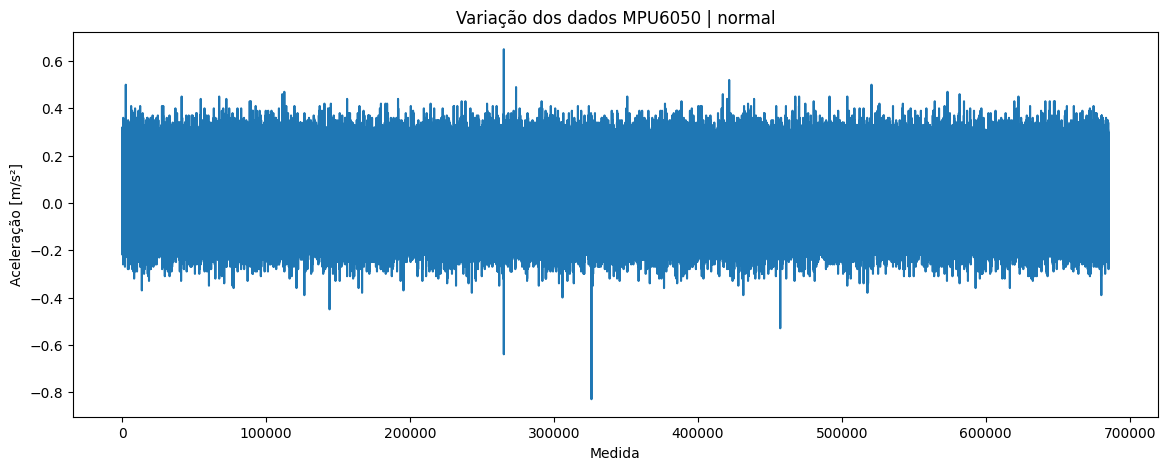

In [48]:
fig, axs = plt.subplots(1, 1, figsize = (14,5))

time_1 = list(range(len(vals_data_1)))

axs.plot(time_1, vals_data_1)

axs.set_xlabel('Medida')
axs.set_ylabel('Aceleração [m/s²]')
axs.set_title('Variação dos dados MPU6050 | normal')

plt.show()

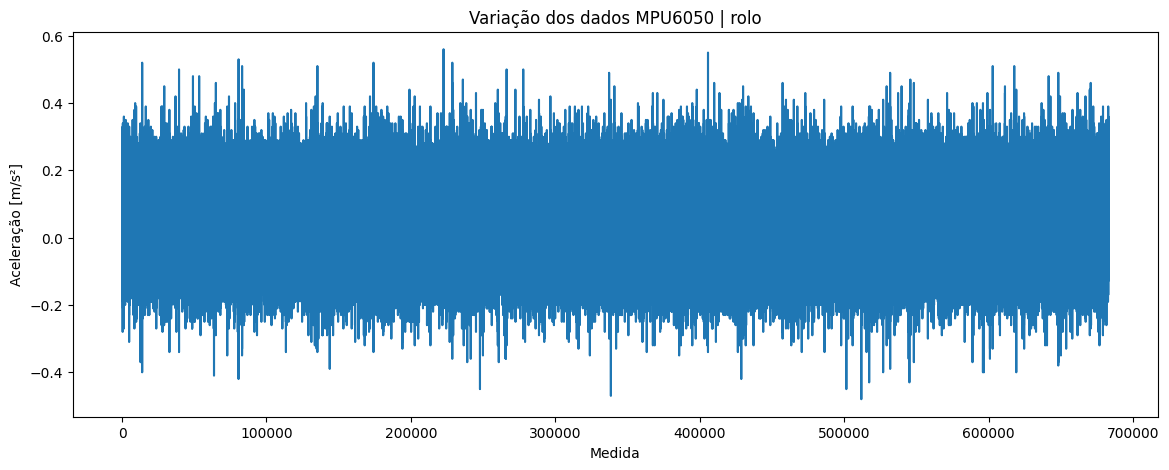

In [49]:
fig, axs = plt.subplots(1, 1, figsize = (14,5))

time_2 = list(range(len(vals_data_2)))

axs.plot(time_2, vals_data_2)

axs.set_xlabel('Medida')
axs.set_ylabel('Aceleração [m/s²]')
axs.set_title('Variação dos dados MPU6050 | rolo')

plt.show()

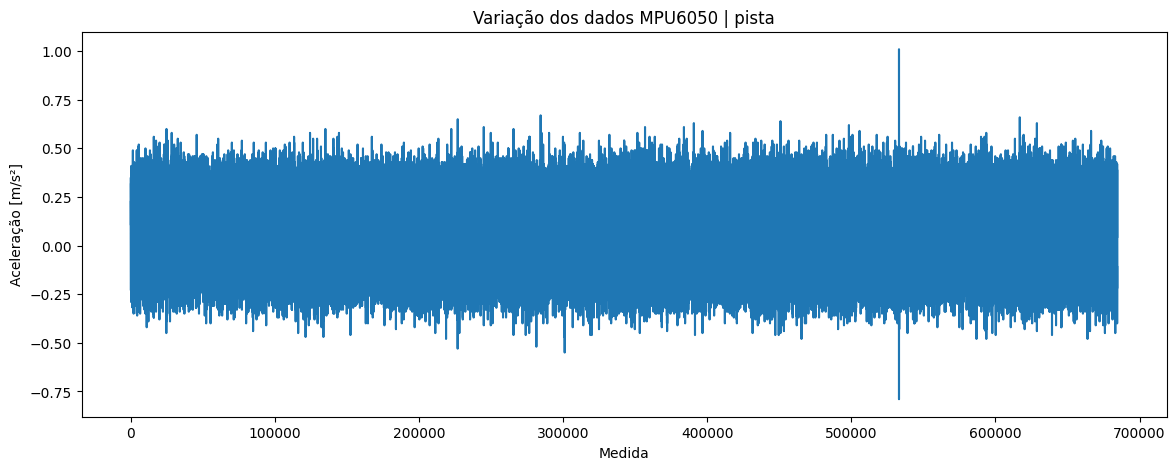

In [50]:
fig, axs = plt.subplots(1, 1, figsize = (14,5))

time_3 = list(range(len(vals_data_3)))

axs.plot(time_3, vals_data_3)

axs.set_xlabel('Medida')
axs.set_ylabel('Aceleração [m/s²]')
axs.set_title('Variação dos dados MPU6050 | pista')

plt.show()

## <font size = 3> Visualização das FFTs

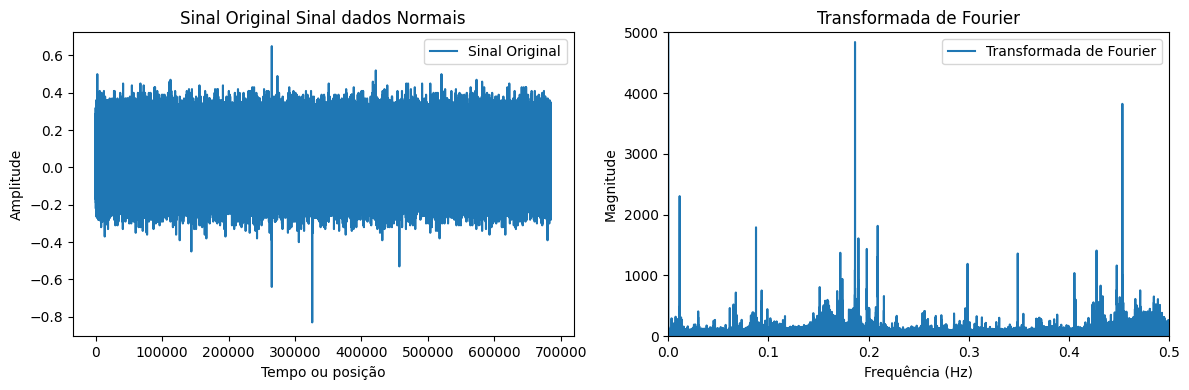


Tempo de execução: 0 min 2 s


In [51]:
grafico_fft(time_1, vals_data_1, 'Sinal dados Normais', (12,4), intervalo_fft_y = (0,5000))

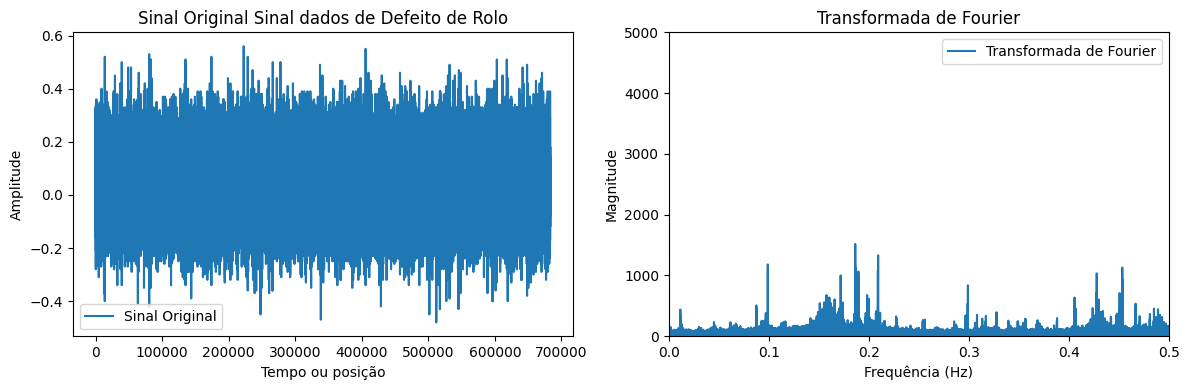


Tempo de execução: 0 min 3 s


In [52]:
grafico_fft(time_2, vals_data_2, 'Sinal dados de Defeito de Rolo', (12,4), intervalo_fft_y = (0,5000))

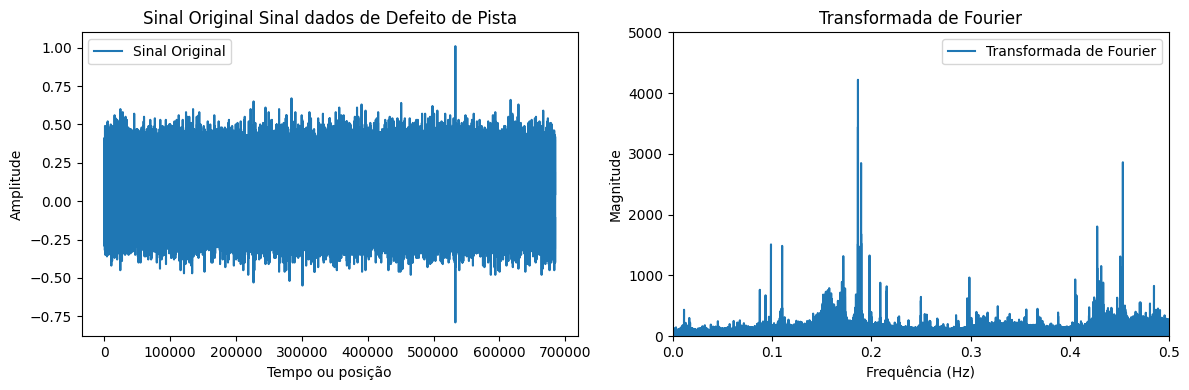


Tempo de execução: 0 min 5 s


In [53]:
grafico_fft(time_3, vals_data_3, 'Sinal dados de Defeito de Pista', (12,4), intervalo_fft_y = (0,5000))

## <font size = 3> Análises de parâmetros estatísticos

In [54]:
valores_totais = [vals_data_1, vals_data_2, vals_data_3]

In [55]:
tabela_estatística = calcular_estatisticas(valores_totais)

,Array,Média,Desvio Padrão,Máximo,Mínimo,Coef. Variação,Assimetria,Curtose,IQR,Entropia
0,1ª Lista,0.0446,0.1000,0.6500,-0.8300,2.2437,0.0001,-0.0487,0.1300,1.1289
1,2ª Lista,0.0454,0.0848,0.5600,-0.4800,1.8673,0.0073,0.2403,0.1100,1.2688
2,3ª Lista,0.0646,0.1255,1.0100,-0.7900,1.9412,0.0031,0.0605,0.1700,1.1218


## <font size = 3> Ajuste do número de dados dos arquivos

In [56]:
dfs = [vals_data_1, vals_data_2, vals_data_3]

titulos = ['normal', 'rolo', 'pista']

In [57]:
for i in range(len(dfs)): print(f'Número de dados para {titulos[i]}: {len(dfs[i])}')

Número de dados para normal: 685302
Número de dados para rolo: 683071
Número de dados para pista: 684490


In [58]:
dfs_ajust = ajust_len_array(dfs)

In [59]:
for i in range(len(dfs_ajust)): print(f'Número de dados para {titulos[i]}: {len(dfs_ajust[i])}')

Número de dados para normal: 683071
Número de dados para rolo: 683071
Número de dados para pista: 683071


# <font size = 5> Etapas de I.A.

<font size = 3> Tratamento de seleção dos dados para gerar os vetores/arrays

In [60]:
dfs_values = [dfs_ajust[0], dfs_ajust[1], dfs_ajust[2]]

np_dfs_values = np.array(dfs_values)

In [61]:
dfs_norm = norm_Min_Max(np_dfs_values, titulos)

Máximo e Mínimo dos dados antes da normalização respectivamente: 

normal: 0.65 | -0.83
rolo: 0.56 | -0.48
pista: 1.01 | -0.79

Máximo e Mínimo dos dados depois da normalização respectivamente: 

normal: 1.0 | 0.0
rolo: 1.0 | 0.0
pista: 1.0 | 0.0


In [62]:
dfs_norm_np = np.array(dfs_norm)

dfs_norm_np = np.expand_dims(dfs_norm_np, axis = -1)

dfs_norm_np.shape

(3, 683071, 1)

## <font size = 5> LSTM

#### <font size = 3> Dados de defeito de rolo

In [ ]:
len(dfs_norm[1])

683071

In [ ]:
data_lstm_1 = dfs_norm[1]

time_df_norm_1 = list(range(0,len(data_lstm_1)))

In [ ]:
# Divide os dados a serem analisados com 80% para treino e 20% para teste
val_split = 0.7

split = int(len(data_lstm_1) * val_split)

train_data = data_lstm_1[0:split]
teste_data = data_lstm_1[split:]

# Define o tamanho das janelas com Npont e tamanho das saídas com Npred
val_window = 10000

Npont, Npred = len(train_data)//val_window, len(teste_data)//val_window

len(train_data), len(teste_data), Npont, Npred

(478149, 204922, 47, 20)

In [ ]:
trainX, trainY = cria_IN_OUT(train_data, Npont)
testeX, testeY = cria_IN_OUT(teste_data, Npont)

print('trainX.shape =', trainX.shape)
print('trainY.shape =', trainY.shape)
print('testeX.shape =', testeX.shape)
print('testeY.shape =', testeY.shape)

trainX.shape = (10173, 27, 1)
trainY.shape = (10173, 20)
testeX.shape = (4360, 27, 1)
testeY.shape = (4360, 20)


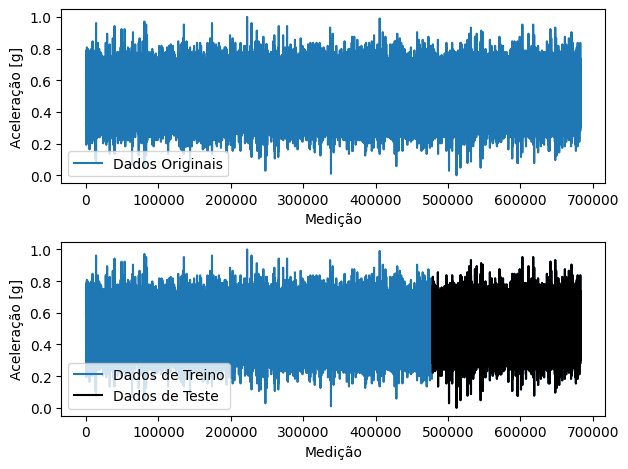

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(time_df_norm_1, data_lstm_1, label = 'Dados Originais');
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time_df_norm_1, data_lstm_1, label = 'Dados de Treino')
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')

plt.plot(time_df_norm_1[split:], teste_data, 'k', label = 'Dados de Teste')
plt.legend()

plt.tight_layout()
plt.show()

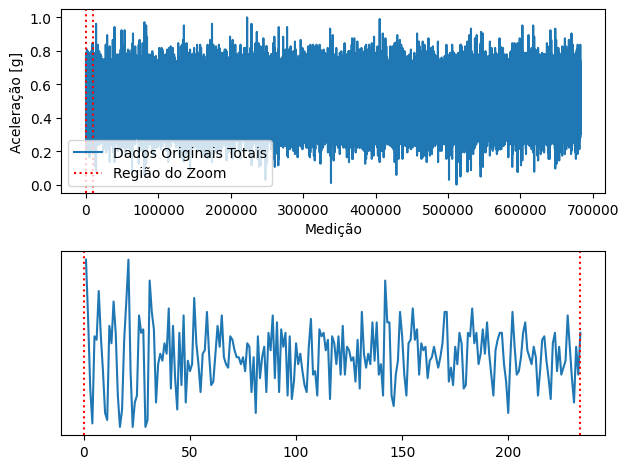

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(time_df_norm_1, data_lstm_1, label = 'Dados Originais Totais');
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')
plt.axvline(0.01, ls = ':', c = 'r');
plt.axvline(val_window, ls = ':', c = 'r', label = 'Região do Zoom');
plt.legend()

plt.subplot(2,1,2)
plt.plot(time_df_norm_1[1:5*(Npont)], data_lstm_1[1:5*(Npont)]);
plt.axvline(0, ls = ':', c = 'r');
plt.axvline(max(time_df_norm_1[1:5*(Npont)]), ls = ':', c = 'r');
plt.yticks([])

plt.tight_layout()
plt.show()

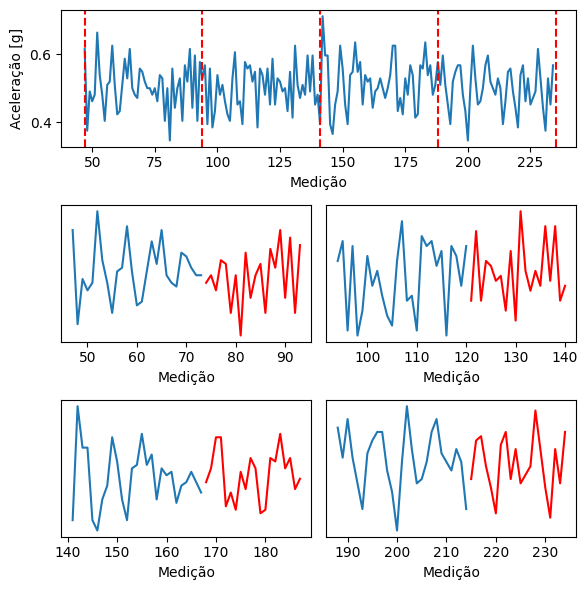

In [ ]:
plt.figure(figsize = (6,6))

plt.subplot(3,1,1)
plt.plot(time_df_norm_1[Npont:5*(Npont)], data_lstm_1[Npont:5*(Npont)])
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')

for i in range(1,6):

  plt.axvline(time_df_norm_1[Npont*i], ls = '--', c = 'r')

for j in range(1,5):

  plt.subplot(3, 2, j+2)

  plt.plot(time_df_norm_1[j*(Npont):(j)*Npont + (Npont - Npred)], trainX[j,:,0]);
  plt.plot(time_df_norm_1[(j)*Npont+(Npont-Npred):(j+1)*Npont], trainY[j,:], 'r');
  plt.xlabel('Medição')
  plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
warnings.filterwarnings('ignore')

LSTM_model_1 = cria_LSTM(

    hidden_units  = 50,                         # Quantas camadas ocultas terá
    dense_units   = Npred,                      # Quantas camadas densas terá
    input_shape   = (Npont - Npred, 1),         # Formato dos dados de entrada
    activation    = ['relu', 'sigmoid'],        # Funções de ativação: o primeiro para as camadas Simple RNN, o segundo para as camadas Ocultas
    loss_name     = 'mse',                      # Define a métrica de Loss
    opt           = tf.keras.optimizers.Adam,   # Define o otimizador
    learning_rate = 0.001                       # Define a taxa de aprendizado

)

LSTM_model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │           1,020 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,420 (44.61 KB)

 Trainable params: 11,420 (44.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history_LSTM_1 = LSTM_model_1.fit(

    trainX,
    trainY,
    epochs = 10,
    batch_size = 1

)

end_time = time.time()

elapsed_time = (end_time - start_time)/60

print(f"\nTempo de processamento do treinamento: {elapsed_time:.2f} minutos")

Epoch 1/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 85s 8ms/step - loss: 0.0066
Epoch 2/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 79s 8ms/step - loss: 0.0061
Epoch 3/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.0059
Epoch 4/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step - loss: 0.0059
Epoch 5/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - loss: 0.0059
Epoch 6/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 0.0059
Epoch 7/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 83s 7ms/step - loss: 0.0059
Epoch 8/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 0.0059
Epoch 9/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 76s 7ms/step - loss: 0.0059
Epoch 10/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 82s 7ms/step - loss: 0.0058

Tempo de processamento do treinamento: 13.62 minutos


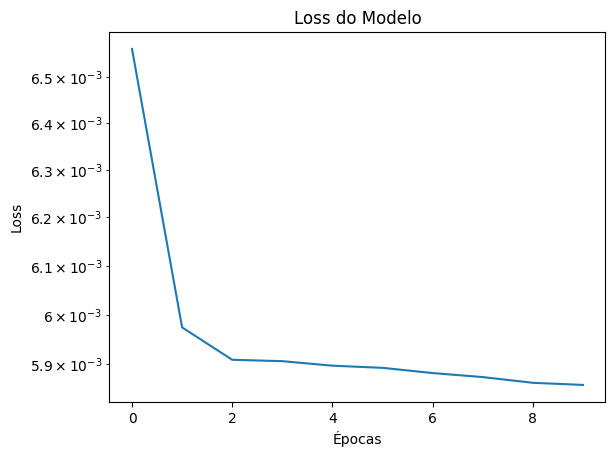

In [ ]:
plt.figure()

plt.plot(history_LSTM_1.history['loss'])
plt.yscale('log')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss do Modelo')

plt.show()

In [ ]:
#faz previsões e calcula os erros
train_predict_lstm = LSTM_model_1.predict(trainX)
teste_predict_lstm = LSTM_model_1.predict(testeX)

train_msre_lstm = np.mean((train_predict_lstm - trainY)**2)
teste_msre_lstm = np.mean((teste_predict_lstm - testeY)**2)

print('\nTreino erro = ', round(train_msre_lstm, 6))
print('Testes erro = ', round(teste_msre_lstm, 6))

318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Treino erro =  0.0059
Testes erro =  0.006103


In [ ]:
finais_verdadeiros_lstm_1 = np.append(trainY, testeY)

predictions_lstm_1 = np.append(train_predict_lstm, teste_predict_lstm)

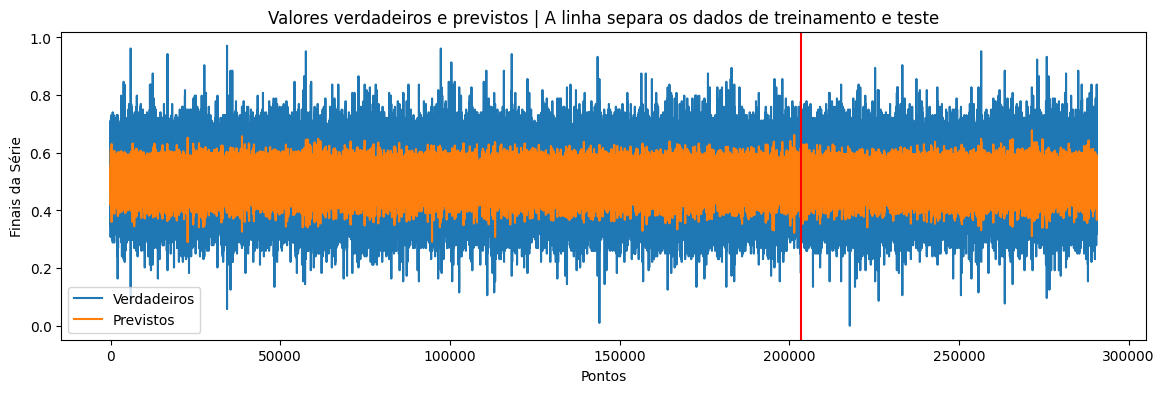

In [ ]:
plt.figure(figsize = (14,4))

plt.title('Valores verdadeiros e previstos | A linha separa os dados de treinamento e teste')
plt.plot(finais_verdadeiros_lstm_1)
plt.plot(predictions_lstm_1)
plt.axvline(len(trainY) * Npred, color = 'r')

plt.xlabel('Pontos')
plt.ylabel('Finais da Série')
plt.legend(['Verdadeiros', 'Previstos'])

plt.show()

In [ ]:
len(finais_verdadeiros_lstm_1)

290660

In [ ]:
dados_resultados_1 = [predictions_lstm_1, finais_verdadeiros_lstm_1]

In [ ]:
tabela_estatística_1_0 = calcular_estatisticas(dados_resultados_1)

,Array,Média,Desvio Padrão,Máximo,Mínimo,Coef. Variação,Assimetria,Curtose,IQR,Entropia
0,1ª Lista,0.5053,0.0335,0.6781,0.2898,0.0663,-0.1287,0.4991,0.0437,1.3213
1,2ª Lista,0.5052,0.0814,0.9712,0.0000,0.1611,0.0047,0.2424,0.1058,1.3058


In [ ]:
dados_sinteticos_ajustados_1 = adaptar_dados(dados_resultados_1[0], dados_resultados_1[1], 300)

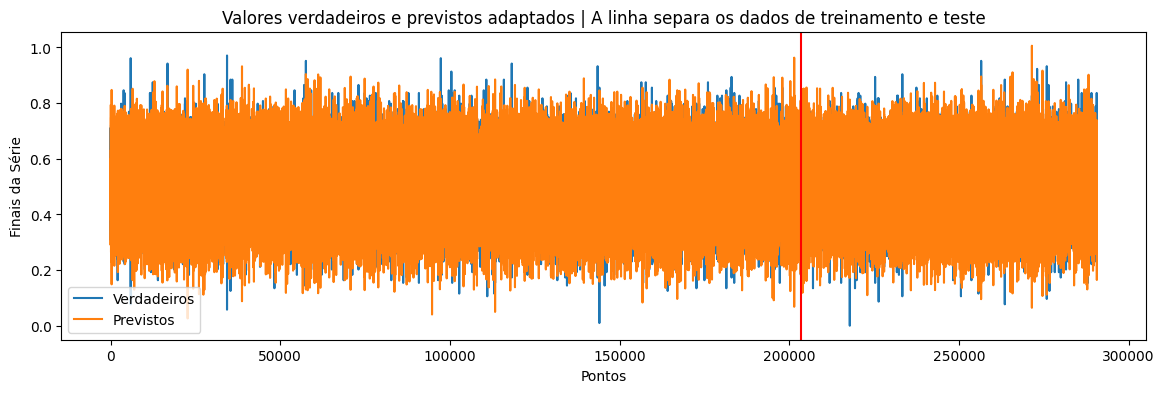

In [ ]:
plt.figure(figsize = (14,4))

plt.title('Valores verdadeiros e previstos adaptados | A linha separa os dados de treinamento e teste')
plt.plot(finais_verdadeiros_lstm_1)
plt.plot(dados_sinteticos_ajustados_1)
plt.axvline(len(trainY) * Npred, color = 'r')

plt.xlabel('Pontos')
plt.ylabel('Finais da Série')
plt.legend(['Verdadeiros', 'Previstos'])

plt.show()

In [ ]:
dados_resultados_adaptados_1 = [dados_sinteticos_ajustados_1, finais_verdadeiros_lstm_1]

In [ ]:
tabela_estatística_1_1 = calcular_estatisticas(dados_resultados_adaptados_1)

,Array,Média,Desvio Padrão,Máximo,Mínimo,Coef. Variação,Assimetria,Curtose,IQR,Entropia
0,1ª Lista,0.5052,0.0899,1.0063,0.0261,0.1780,0.0041,0.3783,0.1177,1.3780
1,2ª Lista,0.5052,0.0814,0.9712,0.0000,0.1611,0.0047,0.2424,0.1058,1.3058


In [ ]:
with open('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/dados_sint_rolo', 'wb') as f:
    pic.dump(dados_sinteticos_ajustados_1, f)

#### <font size = 3> Dados de defeito de pista externa

In [ ]:
len(dfs_norm[2])

683071

In [ ]:
data_lstm_2 = dfs_norm[2]

time_df_norm_2 = list(range(0,len(data_lstm_2)))

In [ ]:
# Divide os dados a serem analisados com 80% para treino e 20% para teste
val_split = 0.7

split = int(len(data_lstm_2) * val_split)

train_data = data_lstm_2[0:split]
teste_data = data_lstm_2[split:]

# Define o tamanho das janelas com Npont e tamanho das saídas com Npred
val_window = 10000

Npont, Npred = len(train_data)//val_window, len(teste_data)//val_window

len(train_data), len(teste_data), Npont, Npred

(478149, 204922, 47, 20)

In [ ]:
trainX, trainY = cria_IN_OUT(train_data, Npont)
testeX, testeY = cria_IN_OUT(teste_data, Npont)

print('trainX.shape =', trainX.shape)
print('trainY.shape =', trainY.shape)
print('testeX.shape =', testeX.shape)
print('testeY.shape =', testeY.shape)

trainX.shape = (10173, 27, 1)
trainY.shape = (10173, 20)
testeX.shape = (4360, 27, 1)
testeY.shape = (4360, 20)


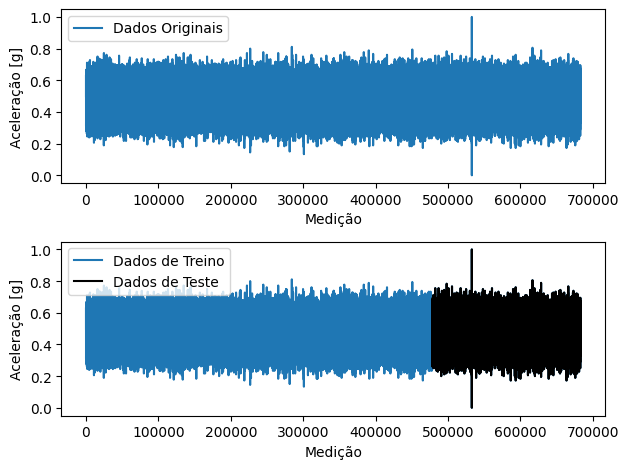

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(time_df_norm_2, data_lstm_2, label = 'Dados Originais');
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')
plt.legend()

plt.subplot(2,1,2)
plt.plot(time_df_norm_2, data_lstm_2, label = 'Dados de Treino')
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')

plt.plot(time_df_norm_2[split:], teste_data, 'k', label = 'Dados de Teste')
plt.legend()

plt.tight_layout()
plt.show()

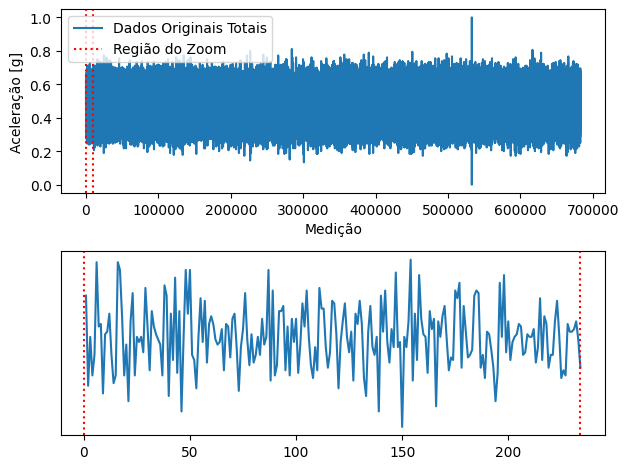

In [ ]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(time_df_norm_2, data_lstm_2, label = 'Dados Originais Totais');
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')
plt.axvline(0.01, ls = ':', c = 'r');
plt.axvline(val_window, ls = ':', c = 'r', label = 'Região do Zoom');
plt.legend()

plt.subplot(2,1,2)
plt.plot(time_df_norm_2[1:5*(Npont)], data_lstm_2[1:5*(Npont)]);
plt.axvline(0, ls = ':', c = 'r');
plt.axvline(max(time_df_norm_2[1:5*(Npont)]), ls = ':', c = 'r');
plt.yticks([])

plt.tight_layout()
plt.show()

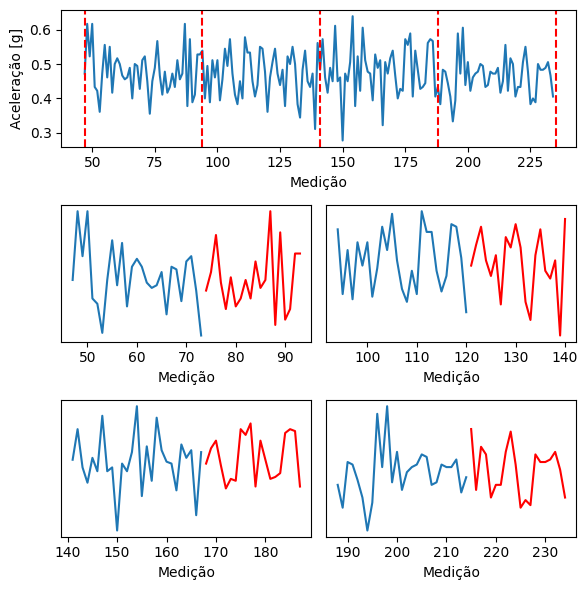

In [ ]:
plt.figure(figsize = (6,6))

plt.subplot(3,1,1)
plt.plot(time_df_norm_2[Npont:5*(Npont)], data_lstm_2[Npont:5*(Npont)])
plt.xlabel('Medição')
plt.ylabel('Aceleração [g]')

for i in range(1,6):

  plt.axvline(time_df_norm_2[Npont*i], ls = '--', c = 'r')

for j in range(1,5):

  plt.subplot(3, 2, j+2)

  plt.plot(time_df_norm_2[j*(Npont):(j)*Npont + (Npont - Npred)], trainX[j,:,0]);
  plt.plot(time_df_norm_2[(j)*Npont+(Npont-Npred):(j+1)*Npont], trainY[j,:], 'r');
  plt.xlabel('Medição')
  plt.yticks([])

plt.tight_layout()
plt.show()

In [ ]:
warnings.filterwarnings('ignore')

LSTM_model_2 = cria_LSTM(

    hidden_units  = 50,                        # Quantas camadas SimpleRNN terá
    dense_units   = Npred,                      # Quantas camadas Ocultas terá
    input_shape   = (Npont - Npred, 1),         # Formato dos dados de entrada
    activation    = ['relu', 'sigmoid'],        # Funções de ativação: o primeiro para as camadas Simple RNN, o segundo para as camadas Ocultas
    loss_name     = 'mse',                      # Define a métrica de Loss
    opt           = tf.keras.optimizers.Adam,   # Define o otimizador
    learning_rate = 0.001                       # Define a taxa de aprendizado

)

LSTM_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,020 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,420 (44.61 KB)

 Trainable params: 11,420 (44.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
start_time = time.time()

history_LSTM_2 = LSTM_model_2.fit(

    trainX,
    trainY,
    epochs = 10,
    batch_size = 1

)

end_time = time.time()

elapsed_time = (end_time - start_time)/60

print(f"\nTempo de processamento do treinamento: {elapsed_time:.2f} minutos")

Epoch 1/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.0048
Epoch 2/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 0.0046
Epoch 3/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 0.0045
Epoch 4/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - loss: 0.0045
Epoch 5/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.0043
Epoch 6/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 139s 8ms/step - loss: 0.0042
Epoch 7/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - loss: 0.0042
Epoch 8/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 78s 8ms/step - loss: 0.0042
Epoch 9/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 83s 8ms/step - loss: 0.0041
Epoch 10/10
10173/10173 ━━━━━━━━━━━━━━━━━━━━ 81s 8ms/step - loss: 0.0042

Tempo de processamento do treinamento: 14.51 minutos


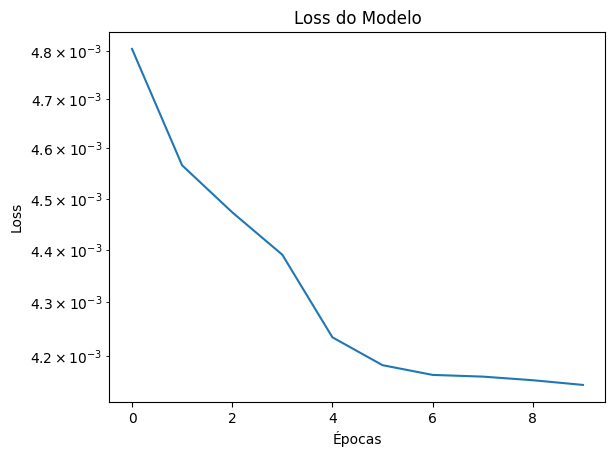

In [ ]:
plt.figure()

plt.plot(history_LSTM_2.history['loss'])
plt.yscale('log')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Loss do Modelo')

plt.show()

In [ ]:
#faz previsões e calcula os erros
train_predict_lstm = LSTM_model_2.predict(trainX)
teste_predict_lstm = LSTM_model_2.predict(testeX)

train_msre_lstm = np.mean((train_predict_lstm - trainY)**2)
teste_msre_lstm = np.mean((teste_predict_lstm - testeY)**2)

print('\nTreino erro = ', round(train_msre_lstm, 6))
print('Testes erro = ', round(teste_msre_lstm, 6))

318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Treino erro =  0.004117
Testes erro =  0.004299


In [ ]:
finais_verdadeiros_lstm_2 = np.append(trainY, testeY)

predictions_lstm_2 = np.append(train_predict_lstm, teste_predict_lstm)

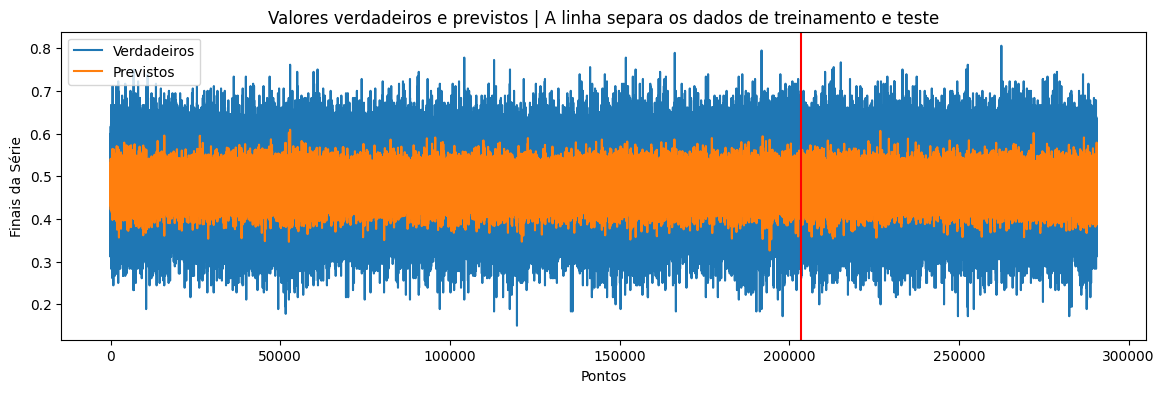

In [ ]:
plt.figure(figsize = (14,4))

plt.title('Valores verdadeiros e previstos | A linha separa os dados de treinamento e teste')
plt.plot(finais_verdadeiros_lstm_2)
plt.plot(predictions_lstm_2)
plt.axvline(len(trainY) * Npred, color = 'r')

plt.xlabel('Pontos')
plt.ylabel('Finais da Série')
plt.legend(['Verdadeiros', 'Previstos'])

plt.show()

In [ ]:
len(finais_verdadeiros_lstm_2)

290660

In [ ]:
dados_resultados_2 = [predictions_lstm_2, finais_verdadeiros_lstm_2]

In [ ]:
tabela_estatística_2_0 = calcular_estatisticas(dados_resultados_2)

,Array,Média,Desvio Padrão,Máximo,Mínimo,Coef. Variação,Assimetria,Curtose,IQR,Entropia
0,1ª Lista,0.4753,0.0261,0.6089,0.3261,0.0549,-0.0243,0.1769,0.0353,1.3851
1,2ª Lista,0.4748,0.0697,0.8056,0.1500,0.1468,0.0008,0.0500,0.0944,1.5269


In [ ]:
dados_sinteticos_ajustados_2 = adaptar_dados(dados_resultados_2[0], dados_resultados_2[1], 300)

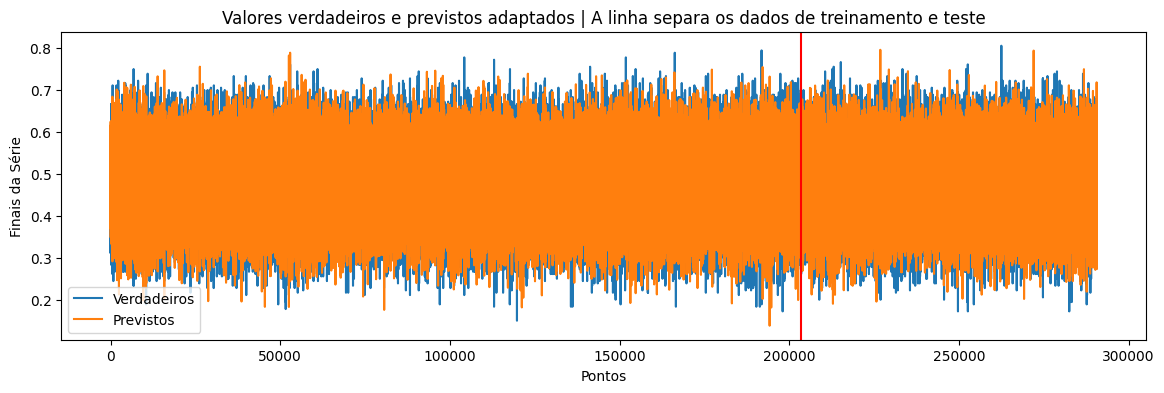

In [ ]:
plt.figure(figsize = (14,4))

plt.title('Valores verdadeiros e previstos adaptados | A linha separa os dados de treinamento e teste')
plt.plot(finais_verdadeiros_lstm_2)
plt.plot(dados_sinteticos_ajustados_2)
plt.axvline(len(trainY) * Npred, color = 'r')

plt.xlabel('Pontos')
plt.ylabel('Finais da Série')
plt.legend(['Verdadeiros', 'Previstos'])

plt.show()

In [ ]:
dados_resultados_adaptados_2 = [dados_sinteticos_ajustados_2, finais_verdadeiros_lstm_2]

In [ ]:
tabela_estatística_2_1 = calcular_estatisticas(dados_resultados_adaptados_2)

,Array,Média,Desvio Padrão,Máximo,Mínimo,Coef. Variação,Assimetria,Curtose,IQR,Entropia
0,1ª Lista,0.4748,0.0615,0.7959,0.1381,0.1296,0.0015,0.1642,0.0831,1.3981
1,2ª Lista,0.4748,0.0697,0.8056,0.1500,0.1468,0.0008,0.0500,0.0944,1.5269


In [ ]:
with open('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/dados_sint_pista_externa', 'wb') as f:
    pic.dump(dados_sinteticos_ajustados_2, f)

#### <font size = 3> Aplicações de CNN com sintéticos depois dados originais

In [ ]:
with open('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/dados_sint_rolo', 'rb') as f:
    sinteticos_rolo = pic.load(f)

In [ ]:
with open('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/dados_sint_pista_externa', 'rb') as f:
    sinteticos_pista = pic.load(f)

In [ ]:
len(sinteticos_rolo), len(sinteticos_pista)

(290660, 290660)

In [ ]:
tamanho_img = 8
numero_divisao = tamanho_img**2
stride = numero_divisao // 2

labels = ['Bom', 'Rol_sint', 'Ext_sint']

In [ ]:
data_test = [dfs_norm[0], sinteticos_rolo, sinteticos_pista]

In [ ]:
data_test_ajust = ajust_len_array(data_test)

In [ ]:
data_norm_sint = [data_test_ajust[0], data_test_ajust[1], data_test_ajust[2]]

X_NORM, OH_Y_NORM = encoder_strides(data_norm_sint, labels, numero_divisao, stride, tamanho_img)

Dados de entrada: (27246, 8, 8, 1)

Labels codificados: (27246, 3)


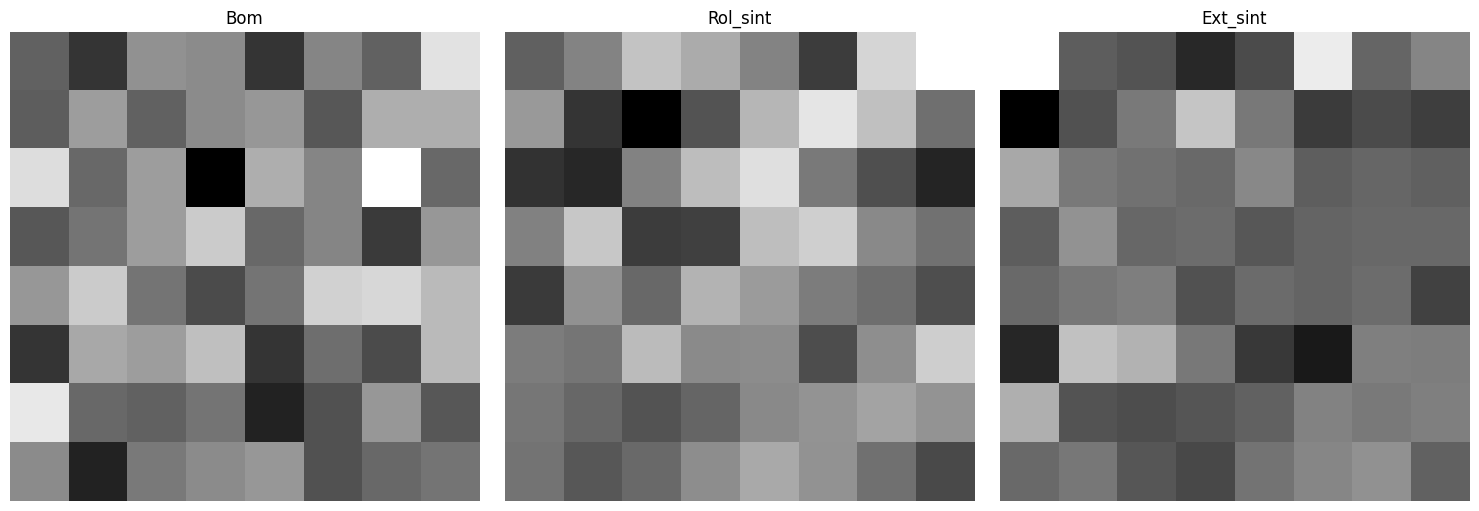

In [ ]:
plot_segments_encoder(data_norm_sint, labels, numero_divisao)

In [ ]:
div_treino = 0.70
div_valida = 0.20
div_testes = 0.10

In [ ]:
X_train_norm, X_validate_norm, X_test_norm, y_train_norm, y_validate_norm, y_test_norm = train_valid_test( X_NORM,
                                                                                                           OH_Y_NORM,
                                                                                                           div_treino,
                                                                                                           div_valida,
                                                                                                           div_testes )

Shape dos dados de treinamento: (19072, 8, 8, 1)
Shape dos dados de validação:   (5450, 8, 8, 1)
Shape dos dados de teste:       (2724, 8, 8, 1)


In [ ]:
batch_size = 64
epocas = 10
taxa_aprendizado = 0.001

In [ ]:
dst_train_norm = create_dataset(X_train_norm,    y_train_norm,    batch_size)
dst_valid_norm = create_dataset(X_validate_norm, y_validate_norm, batch_size)
dst_teste_norm = create_dataset(X_test_norm,     y_test_norm,     batch_size)

In [ ]:
CNN_model = tf.keras.models.Sequential([

    # Camada de entrada
    tf.keras.layers.InputLayer((tamanho_img, tamanho_img, 1)),

    # Primeira camada convolucional e MaxPooling
    tf.keras.layers.Conv2D(filters     = 8,
                           kernel_size = (3,3),
                           strides     = (1,1),
                           padding     = 'same',
                           activation  = 'relu'),

    tf.keras.layers.MaxPooling2D((2,2)),

    # Segunda camada convolucional e MaxPooling
    tf.keras.layers.Conv2D(filters     = 16,
                           kernel_size = (3,3),
                           strides     = (1,1),
                           padding     = 'same',
                           activation  = 'relu'),

    tf.keras.layers.MaxPooling2D((2,2)),


    # "Achatamento"
    tf.keras.layers.Flatten(),

    # Uma camada densa com 80 neurônios
    tf.keras.layers.Dense(80, activation = 'relu'),

    # Camada de saída
    tf.keras.layers.Dense(len(labels), activation = 'softmax')

])

CNN_model.compile(

    optimizer = tf.keras.optimizers.RMSprop(learning_rate = taxa_aprendizado),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', 'precision', 'recall']

)

CNN_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 8)             │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             243 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,691 (26.14 KB)

 Trainable params: 6,691 (26.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_CNN_sint_model = train_model(CNN_model, dst_train_norm, dst_valid_norm, epocas)

Epoch 1/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5102 - loss: 1.0046 - precision: 0.7124 - recall: 0.0727 - val_accuracy: 0.8844 - val_loss: 0.5291 - val_precision: 0.9591 - val_recall: 0.8011
Epoch 2/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8918 - loss: 0.4234 - precision: 0.9344 - recall: 0.8138 - val_accuracy: 0.8794 - val_loss: 0.3047 - val_precision: 0.8947 - val_recall: 0.8510
Epoch 3/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9423 - loss: 0.1880 - precision: 0.9449 - recall: 0.9364 - val_accuracy: 0.9826 - val_loss: 0.0883 - val_precision: 0.9836 - val_recall: 0.9813
Epoch 4/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9669 - loss: 0.1101 - precision: 0.9672 - recall: 0.9660 - val_accuracy: 0.9985 - val_loss: 0.0427 - val_precision: 0.9985 - val_recall: 0.9985
Epoch 5/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9758 - loss: 0.0768 - precision: 0.9759 - recall: 0.9756 - val_accuracy: 0.9945 - val_loss: 0

In [ ]:
evaluate_model(CNN_model, dst_teste_norm)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9879 - loss: 0.0281 - precision: 0.9879 - recall: 0.9879

Tempo de processamento da validação: 0.01 minutos




,Loss,Acurácia,Precisão,Recall
Valor,0.03,98.94,98.94,98.94


In [ ]:
esperado_norm, pred_norm = test_model(CNN_model, X_test_norm, y_test_norm)

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Tempo de processamento do teste: 0.01 minutos

Resultados Esperados: [0 1 1 ... 1 1 0]

Resultados Previstos: [0 1 1 ... 1 1 0]

Teste teve 98.94% de aproveitamento



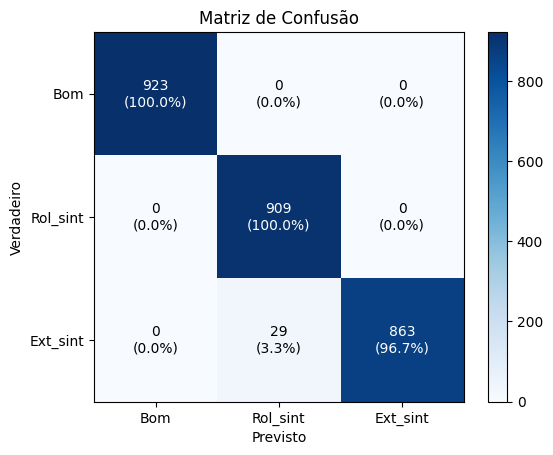

In [ ]:
matriz_confusao(esperado_norm, pred_norm, labels)

In [ ]:
data_origin = [dfs_norm[0][0:len(sinteticos_rolo)],
               dfs_norm[1][0:len(sinteticos_rolo)],
               dfs_norm[2][0:len(sinteticos_rolo)]]

In [ ]:
len(sinteticos_rolo), len(data_origin[0])

(290660, 290660)

In [ ]:
data_norm_origin = [data_origin[0], data_origin[1], data_origin[2]]

X_NORM_ORIGIN, OH_Y_NORM_ORIGIN = encoder_strides(data_norm_origin, labels, numero_divisao, stride, tamanho_img)

Dados de entrada: (27246, 8, 8, 1)

Labels codificados: (27246, 3)


In [ ]:
div_treino_origin = 0.05
div_valida_origin = 0.05
div_testes_origin = 0.90

In [ ]:
X_train_norm_origin, X_validate_norm_origin, X_test_norm_origin, y_train_norm_origin, y_validate_norm_origin, y_test_norm_origin = train_valid_test(

    X_NORM_ORIGIN,
    OH_Y_NORM_ORIGIN,
    div_treino_origin,
    div_valida_origin,
    div_testes_origin)

Shape dos dados de treinamento: (1362, 8, 8, 1)
Shape dos dados de validação:   (1363, 8, 8, 1)
Shape dos dados de teste:       (24521, 8, 8, 1)


In [ ]:
esperado_norm_origin, pred_norm_origin = test_model(CNN_model, X_test_norm_origin, y_test_norm_origin)

767/767 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step

Tempo de processamento do teste: 0.08 minutos

Resultados Esperados: [0 1 1 ... 0 2 2]

Resultados Previstos: [0 1 1 ... 0 2 2]

Teste teve 97.39% de aproveitamento



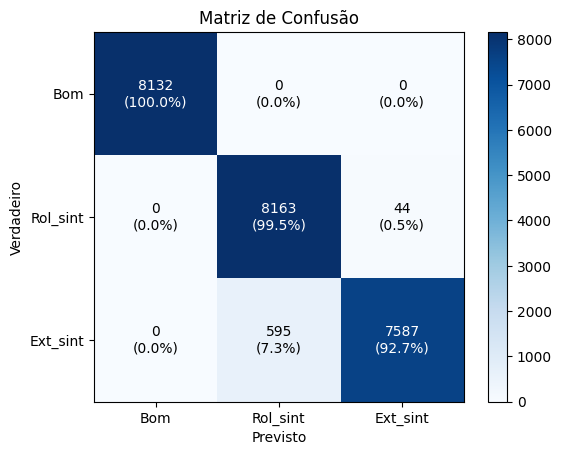

In [ ]:
matriz_confusao(esperado_norm_origin, pred_norm_origin, labels)

#### <font size = 3> Análises gráficas e um terceiro teste com os dados finais do montante original

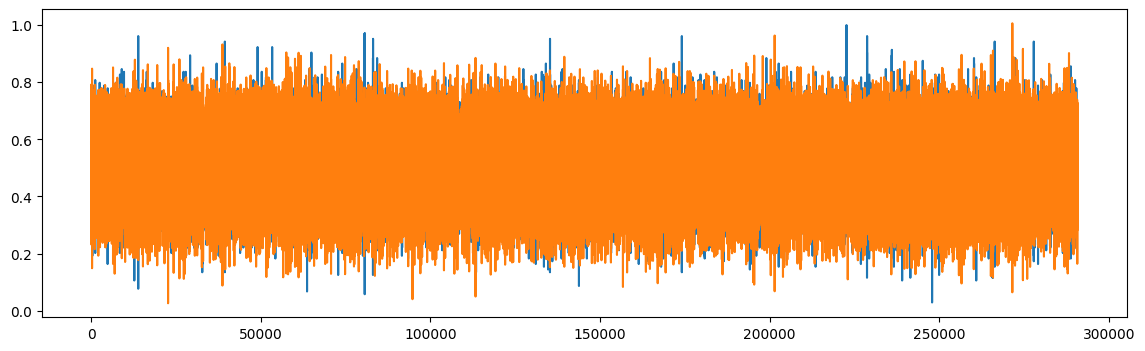

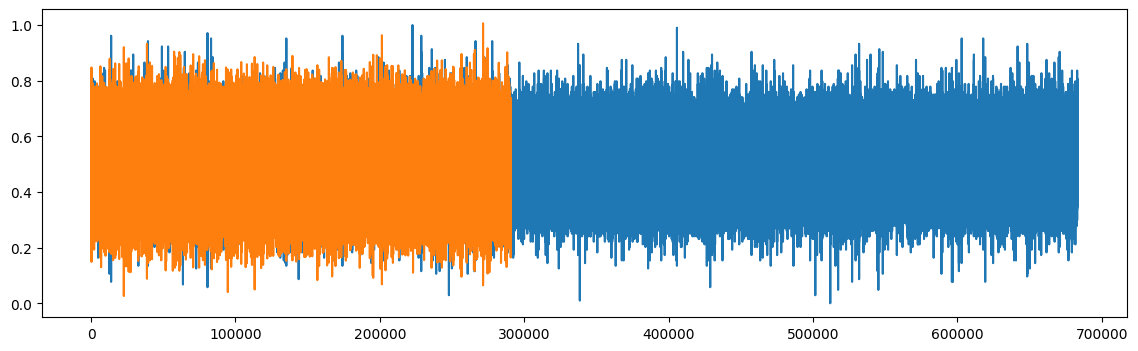

In [ ]:
plt.figure(figsize = (14,4))
plt.plot(data_origin[1])
plt.plot(sinteticos_rolo)
plt.show()

plt.figure(figsize = (14,4))
plt.plot(dfs_norm[1])
plt.plot(sinteticos_rolo)
plt.show()

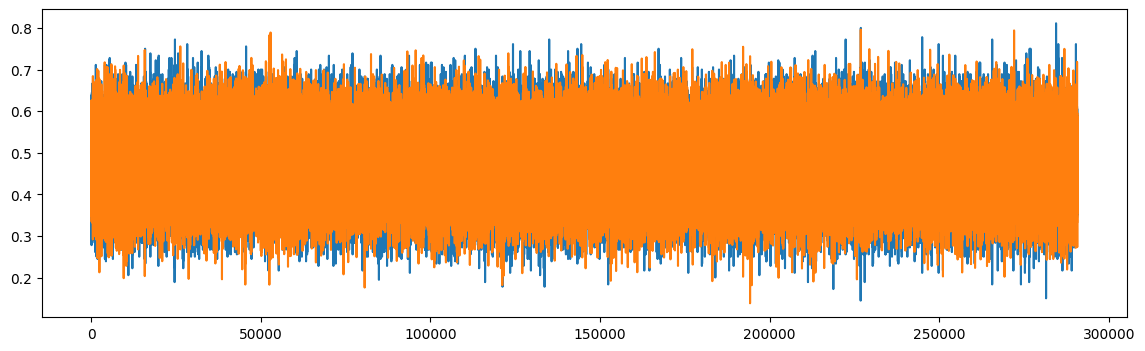

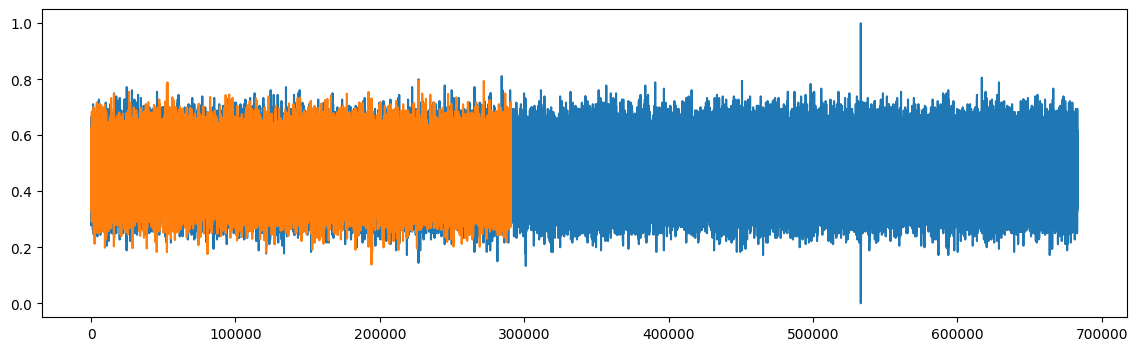

In [ ]:
plt.figure(figsize = (14,4))
plt.plot(data_origin[2])
plt.plot(sinteticos_pista)
plt.show()

plt.figure(figsize = (14,4))
plt.plot(dfs_norm[2])
plt.plot(sinteticos_pista)
plt.show()

In [ ]:
finais_normal = dfs_norm[0][-len(sinteticos_rolo):]
finais_rolo   = dfs_norm[1][-len(sinteticos_rolo):]
finais_pista  = dfs_norm[2][-len(sinteticos_rolo):]

len(finais_normal), len(finais_rolo), len(finais_pista)

(290660, 290660, 290660)

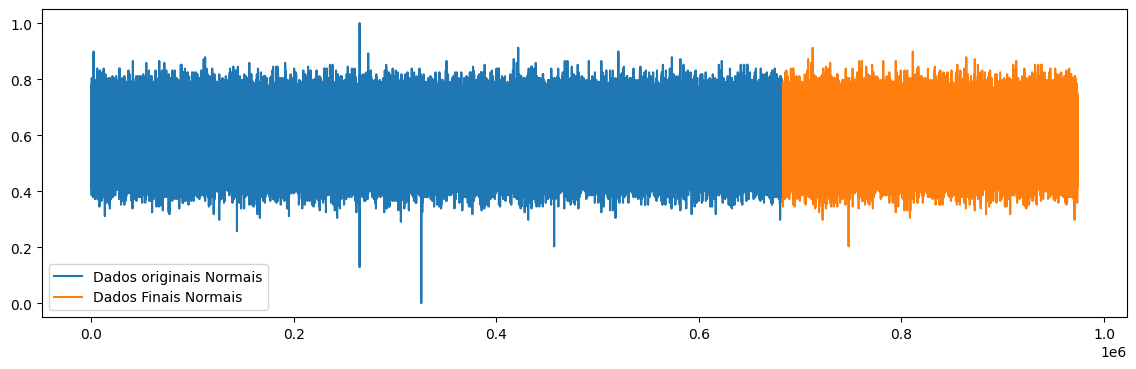

In [ ]:
warnings.filterwarnings('ignore')

x1_0 = list(range(len(dfs_norm[0])))
x2_0 = list(range(len(dfs_norm[0]), len(dfs_norm[0]) + len(finais_normal)))

plt.figure(figsize = (14,4))
plt.plot(x1_0, dfs_norm[0],   label = 'Dados originais Normais')
plt.plot(x2_0, finais_normal, label = 'Dados Finais Normais')

plt.legend()

plt.show()

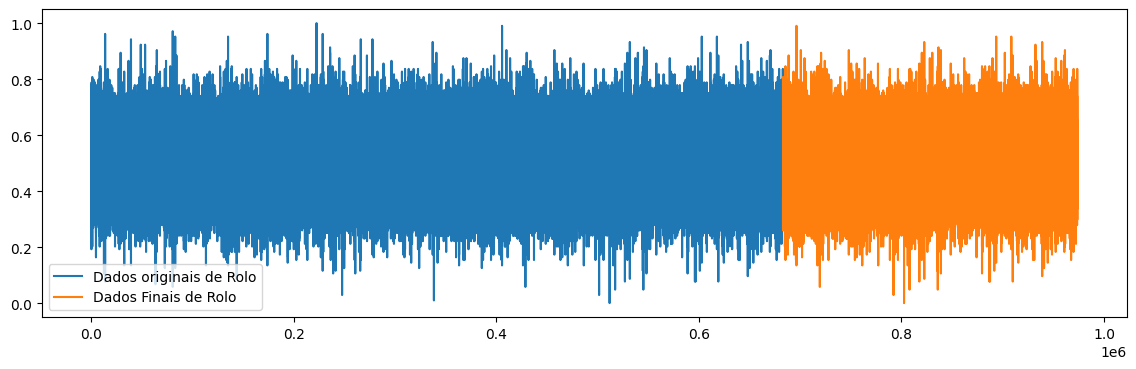

In [ ]:
warnings.filterwarnings('ignore')

x1 = list(range(len(dfs_norm[1])))
x2 = list(range(len(dfs_norm[1]), len(dfs_norm[1]) + len(finais_rolo)))

plt.figure(figsize = (14,4))
plt.plot(x1, dfs_norm[1], label = 'Dados originais de Rolo')
plt.plot(x2, finais_rolo, label = 'Dados Finais de Rolo')

plt.legend()

plt.show()

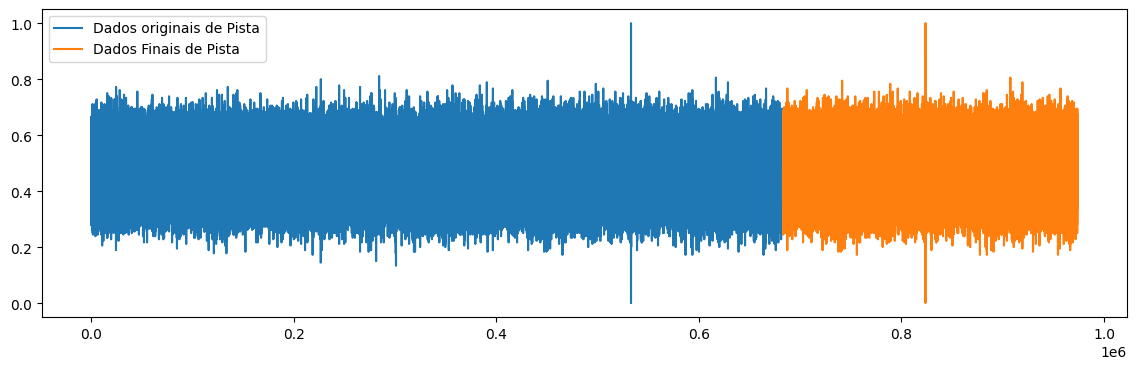

In [ ]:
warnings.filterwarnings('ignore')

x1_2 = list(range(len(dfs_norm[2])))
x2_2 = list(range(len(dfs_norm[2]), len(dfs_norm[2]) + len(finais_pista)))

plt.figure(figsize = (14,4))
plt.plot(x1_2, dfs_norm[2],  label = 'Dados originais de Pista')
plt.plot(x2_2, finais_pista, label = 'Dados Finais de Pista')

plt.legend()

plt.show()

In [ ]:
data_extra = [finais_normal, finais_rolo, finais_pista]

labels_extra = ['Bom_finais', 'Rol_finais', 'Ext_finais']

In [ ]:
X_NORM_EXTRA, OH_Y_NORM_EXTRA = encoder_strides(data_extra, labels_extra, numero_divisao, stride, tamanho_img)

Dados de entrada: (27246, 8, 8, 1)

Labels codificados: (27246, 3)


In [ ]:
div_treino_extra = 0.05
div_valida_extra = 0.05
div_testes_extra = 0.90

In [ ]:
X_train_norm_extra, X_validate_norm_extra, X_test_norm_extra, y_train_norm_extra, y_validate_norm_extra, y_test_norm_extra = train_valid_test(

    X_NORM_EXTRA,
    OH_Y_NORM_EXTRA,
    div_treino_extra,
    div_valida_extra,
    div_testes_extra)

Shape dos dados de treinamento: (1362, 8, 8, 1)
Shape dos dados de validação:   (1363, 8, 8, 1)
Shape dos dados de teste:       (24521, 8, 8, 1)


In [ ]:
esperado_norm_extra, pred_norm_extra = test_model(CNN_model, X_test_norm_extra, y_test_norm_extra)

767/767 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

Tempo de processamento do teste: 0.05 minutos

Resultados Esperados: [1 2 2 ... 0 1 0]

Resultados Previstos: [1 2 2 ... 0 1 0]

Teste teve 96.57% de aproveitamento



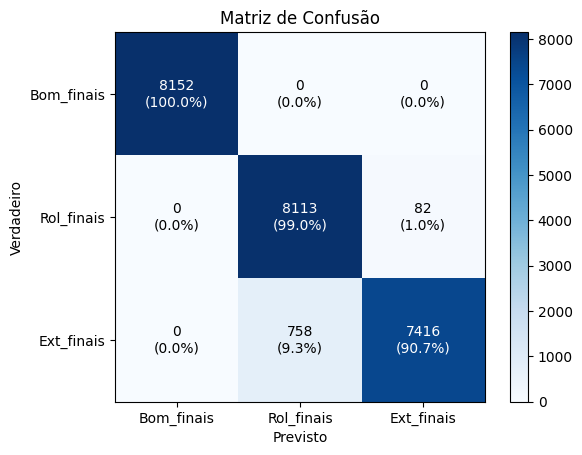

In [ ]:
matriz_confusao(esperado_norm_extra, pred_norm_extra, labels_extra)

#### <font size = 3> Códigos para salvamento do modelo no drive

In [ ]:
CNN_model.save('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/CNN_model.keras')

In [ ]:
modelo_import = tf.keras.models.load_model('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/Dados_sinteticos_teste/CNN_model.keras')

modelo_import.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 8)             │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 80)                  │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             243 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,384 (52.29 KB)

 Trainable params: 6,691 (26.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,693 (26.15 KB)

## <font size = 5> CNN <font size = 4> - para aplicação em uC

In [110]:
tamanho_img = 8

numero_divisao = tamanho_img**2

stride = tamanho_img//2

In [111]:
X_CNN, OHE_CNN = encoder_strides_ndim(dfs_norm_np, titulos, numero_divisao, stride, tamanho_img)

Dados de entrada: (512256, 8, 8, 1)

Labels codificados: (512256, 3)


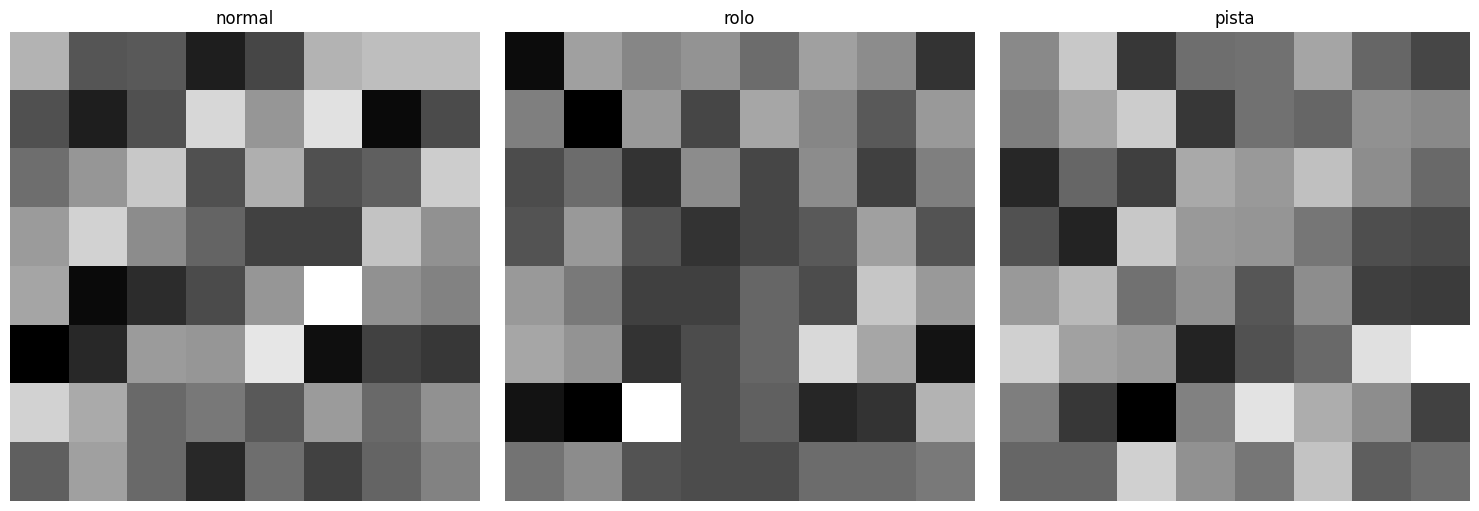

In [125]:
plot_segments_encoder(dfs_norm_np, titulos, numero_divisao)

In [112]:
divisao_treino_CNN = 0.70
divisao_valida_CNN = 0.20
divisao_testes_CNN = 0.10

In [113]:
X_train_norm, X_validate_norm, X_test_norm, y_train_norm, y_validate_norm, y_test_norm = train_valid_test( X_CNN,
                                                                                                           OHE_CNN,
                                                                                                           divisao_treino_CNN,
                                                                                                           divisao_valida_CNN,
                                                                                                           divisao_testes_CNN )

Shape dos dados de treinamento: (358579, 8, 8, 1)
Shape dos dados de validação:   (102452, 8, 8, 1)
Shape dos dados de teste:       (51225, 8, 8, 1)


In [114]:
batch_size = 512
epocas = 5
taxa_aprendizado = 0.0001

In [115]:
dst_train_norm = create_dataset(X_train_norm,    y_train_norm,    batch_size)
dst_valid_norm = create_dataset(X_validate_norm, y_validate_norm, batch_size)
dst_teste_norm = create_dataset(X_test_norm,     y_test_norm,     batch_size)

In [116]:
CNN_model = tf.keras.models.Sequential([

    # Camada de entrada
    tf.keras.layers.InputLayer((X_train_norm.shape[1], X_train_norm.shape[2], X_train_norm.shape[3])),

    # Primeira camada convolucional e MaxPooling
    tf.keras.layers.Conv2D(filters     = 8,
                           kernel_size = (3,3),
                           strides     = (1,1),
                           padding     = 'same',
                           activation  = 'relu'),

    tf.keras.layers.MaxPooling2D((2,2)),

    # Segunda camada convolucional e MaxPooling
    tf.keras.layers.Conv2D(filters     = 16,
                           kernel_size = (3,3),
                           strides     = (1,1),
                           padding     = 'same',
                           activation  = 'relu'),

    tf.keras.layers.MaxPooling2D((2,2)),


    # "Achatamento"
    tf.keras.layers.Flatten(),

    # Uma camada densa com 64 neurônios
    tf.keras.layers.Dense(64, activation = 'relu'),

    # Camada de saída
    tf.keras.layers.Dense(len(titulos), activation = 'softmax')

])

CNN_model.compile(

    optimizer = tf.keras.optimizers.Adam(learning_rate = taxa_aprendizado),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy', 'precision', 'recall']

)

CNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,603 (21.89 KB)

 Trainable params: 5,603 (21.89 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
history_CNN_model = train_model(CNN_model, dst_train_norm, dst_valid_norm, epocas)

Epoch 1/5
701/701 ━━━━━━━━━━━━━━━━━━━━ 28s 34ms/step - accuracy: 0.3616 - loss: 1.0705 - precision: 0.3177 - recall: 0.0123 - val_accuracy: 0.8423 - val_loss: 0.6449 - val_precision: 1.0000 - val_recall: 0.3328
Epoch 2/5
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9210 - loss: 0.4962 - precision: 0.9769 - recall: 0.6291 - val_accuracy: 0.9686 - val_loss: 0.2067 - val_precision: 0.9690 - val_recall: 0.9681
Epoch 3/5
701/701 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.9741 - loss: 0.1654 - precision: 0.9745 - recall: 0.9739 - val_accuracy: 0.9844 - val_loss: 0.0901 - val_precision: 0.9844 - val_recall: 0.9844
Epoch 4/5
701/701 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9860 - loss: 0.0770 - precision: 0.9860 - recall: 0.9860 - val_accuracy: 0.9897 - val_loss: 0.0519 - val_precision: 0.9897 - val_recall: 0.9897
Epoch 5/5
701/701 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9901 - loss: 0.0472 - precision: 0.9901 - recall: 0.9901 - val_accuracy: 0.9922 - val_los

In [118]:
evaluate_model(CNN_model, dst_teste_norm)

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9915 - loss: 0.0356 - precision: 0.9915 - recall: 0.9915

Tempo de processamento da validação: 0.02 minutos




,Loss,Acurácia,Precisão,Recall
Valor,0.04,99.16,99.16,99.16


In [119]:
esperado_norm, pred_norm = test_model(CNN_model, X_test_norm, y_test_norm)

1601/1601 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

Tempo de processamento do teste: 0.10 minutos

Resultados Esperados: [0 1 2 ... 0 2 2]

Resultados Previstos: [0 1 2 ... 0 2 2]

Teste teve 99.16% de aproveitamento



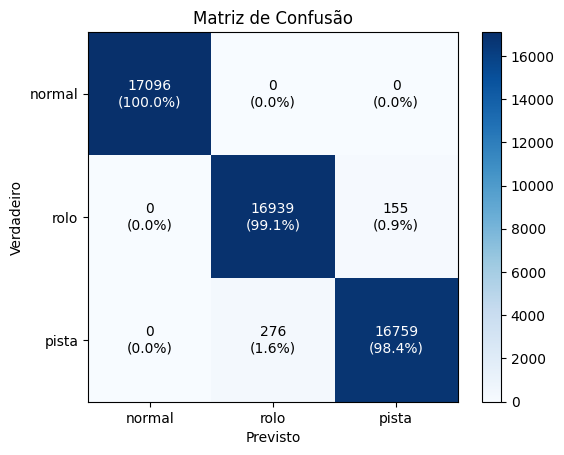

In [120]:
matriz_confusao(esperado_norm, pred_norm, titulos)

In [121]:
CNN_model.save('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/CNN_model_trained.keras')

In [122]:
CNN_model = tf.keras.models.load_model('/content/drive/MyDrive/Laboratório de I.A./Dados Lucas/CNN_model_trained.keras')

CNN_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 16)       │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,811 (65.67 KB)

 Trainable params: 5,603 (21.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,208 (43.79 KB)

In [123]:
gera_model_tflite(CNN_model, 'CNN_model')

Saved artifact at '/tmp/tmpyrvfoo8c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8, 8, 1), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133716013677072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013675920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013674384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013675728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716401773776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013671504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013676112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133716013671888: TensorSpec(shape=(), dtype=tf.resource, name=None)

Model is 25800 bytes

Header file, CNN_model.h, is 159,134 bytes.

Open the side panel (refresh if needed). Double click CNN_model.h to download the file.


In [ ]:
X_test_norm[0]

array([[[0.51666667],
        [0.46111111],
        [0.54444444],
        [0.50555556],
        [0.5       ],
        [0.43333333],
        [0.51111111],
        [0.41111111],
        [0.47222222],
        [0.56111111]],

       [[0.45      ],
        [0.48888889],
        [0.41111111],
        [0.45555556],
        [0.45555556],
        [0.62222222],
        [0.60555556],
        [0.37777778],
        [0.45555556],
        [0.34444444]],

       [[0.5       ],
        [0.65      ],
        [0.61111111],
        [0.47777778],
        [0.31666667],
        [0.37777778],
        [0.47222222],
        [0.57777778],
        [0.53333333],
        [0.42777778]],

       [[0.38333333],
        [0.46111111],
        [0.53888889],
        [0.47222222],
        [0.47777778],
        [0.53888889],
        [0.36666667],
        [0.53333333],
        [0.46111111],
        [0.47222222]],

       [[0.48888889],
        [0.50555556],
        [0.42222222],
        [0.42222222],
        [0.41111111],
  

In [108]:
random_index = np.random.randint(0, len(X_test_norm))

print(f'Valor de teste escolhido: {random_index}\n')

xtest_selec = valor_teste(CNN_model, X_test_norm, y_test_norm, random_index)

Valor de teste escolhido: 34919

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Resultado Esperado: [2]

Resultado Previsto: [2]

Teste teve 100.0% de aproveitamento



In [109]:
matriz_teste = format_xtest_selec(xtest_selec)

print(f'\n{type(matriz_teste)}')

{
  {0.5096154, 0.4615385, 0.4807692, 0.5673077, 0.4134615, 0.4423077, 0.5096154, 0.5961538},
  {0.6153846, 0.4326923, 0.3653846, 0.4903846, 0.3846154, 0.7115385, 0.4711538, 0.4903846},
  {0.3846154, 0.4134615, 0.4807692, 0.6346154, 0.6442308, 0.5192308, 0.4903846, 0.4230769},
  {0.6346154, 0.5000000, 0.5576923, 0.5673077, 0.3942308, 0.4423077, 0.5576923, 0.4711538},
  {0.5096154, 0.5000000, 0.5096154, 0.4615385, 0.5288462, 0.5096154, 0.4326923, 0.4134615},
  {0.5480769, 0.6057692, 0.5192308, 0.4423077, 0.4038462, 0.5288462, 0.6442308, 0.4615385},
  {0.4711538, 0.4038462, 0.4807692, 0.5961538, 0.5576923, 0.5000000, 0.3846154, 0.5192308},
  {0.4134615, 0.5961538, 0.4615385, 0.5000000, 0.5288462, 0.5961538, 0.5576923, 0.4038462}
}

<class 'str'>


# <font size = 4> Teste MQTT

In [ ]:
!pip install --upgrade paho-mqtt

In [ ]:
import paho.mqtt.client as mqtt
import json
import struct

In [ ]:
# Configuração do Broker MQTT (use o IP correto do broker)
BROKER = "192.168.15.79"
PORT   = 1883
TOPIC  = "meu_topico"

# Criando a array de inteiros
dados = [10, 20, 30, 40, 50]

# Convertendo para buffer (4 bytes por inteiro, formato '5i' para 5 inteiros)
buffer = struct.pack("5i", *dados)

print(f"Buffer: {buffer}")

Buffer: b'\n\x00\x00\x00\x14\x00\x00\x00\x1e\x00\x00\x00(\x00\x00\x002\x00\x00\x00'


In [ ]:
# Criando cliente MQTT e conectando
client = mqtt.Client()

client.connect(BROKER, PORT, 60)

# Publicando o buffer
client.publish(TOPIC, buffer)

print(f"Enviado (bytes): {buffer}")

client.disconnect()

In [ ]:
broker = 'broker.emqx.io'
port   =  1883
topic  = 'posicao_ML'

client_id = f'python-mqtt-{random.randint(0, 1000)}'

username = 'emqx'
password = 'public'

msg = 'oi'

In [ ]:
def connect_mqtt():

  def on_connect(client, userdata, flags, rc):
      if rc == 0:
          print("Connected to MQTT Broker!")
      else:
          print("Failed to connect, return code %d\n", rc)

  client = mqtt.Client(client_id)
  client.username_pw_set(username, password)

  client.on_connect = on_connect
  client.connect(broker, port)

  return client

In [ ]:
def publish(msg, topico, client):

  result = client.publish(topico, msg)

  status = result[0]

  if status == 0:
      print(f"Send `{msg}` to topic `{topico}`")
  else:
      print(f"Failed to send message to topic {topico}")

In [ ]:
client = connect_mqtt()

client.loop_start()

publish(mensagem, topic, client)